# **Attrition: Company losing its customer base**

**Atrisi adalah suatu proses di mana tenaga kerja di suatu perusahaan berkurang, mengikuti suatu periode di mana sejumlah orang pensiun atau mengundurkan diri, dan tidak memerlukan pergantian dalam waktu cepat.**<br>

- Pengurangan staf karena atrisi sering disebut pembekuan perekrutan dan dipandang sebagai cara yang tidak terlalu mengganggu untuk memangkas tenaga kerja dan mengurangi penggajian daripada PHK.
- Dalam notebook ini, tujuan kami adalah:
 1. Menganalisis kumpulan data secara lengkap dengan masing-masing fiturnya dan menemukan **apa saja alasan di balik Atrisi Karyawan**.
 2. Menemukan **faktor utama** yang menyebabkan atrisi karyawan.<br><br>

### **Description about the data**

- Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

- EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

- JobInvolvement: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

- JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

- PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

- RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

- WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'<br><br>

### **Additinal Description Which will help to understand the features**

- **Hourly Rate**: Upah karyawan per jam.

- **EmployeeNumber**: Nomor Pegawai adalah nomor unik yang telah ditetapkan kepada setiap Pegawai Negeri dan mantan Pegawai Negeri serta pejabat terpilih di Pangkalan Data Kepegawaian dan Kepegawaian (PPDB).

- **JobLevel**: Level pekerjaan, juga dikenal sebagai peringkat dan klasifikasi pekerjaan, menetapkan tingkat tanggung jawab dan ekspektasi peran di organisasi Anda. **Job Level dapat dipengaruhi lebih lanjut oleh kinerja, senioritas, pengetahuan, keterampilan, atau jabatan, dan sering dikaitkan dengan pay band**. Cara penyusunan tingkat pekerjaan harus ditentukan oleh kebutuhan organisasi dan tim Anda yang unik.

- **StockOptionLevel**: Opsi saham karyawan, juga dikenal sebagai ESO, adalah opsi saham dalam saham perusahaan yang diberikan oleh pemberi kerja kepada karyawan tertentu. Biasanya saham diberikan kepada mereka yang berada di posisi manajemen atau pejabat. Opsi saham memberi karyawan hak untuk membeli sejumlah saham tertentu pada harga tertentu, selama periode waktu tertentu. Opsi biasanya memiliki tanggal kedaluwarsa juga, di mana opsi tersebut harus dilakukan, jika tidak, opsi tersebut akan menjadi tidak berharga. 

## Import package and data

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/bootcamp/WA_Fn-UseC_-HR-Employee-Attrition.csv')
use_df = df.copy()
use_df.head()

Mounted at /content/drive


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# STAGE 1

## **DATA EXPLORATION**

In [ ]:
use_df.shape

(1470, 35)

(1470, 35)

In [ ]:
use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
use_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

No     1233
Yes     237
Name: Attrition, dtype: int64

### Value Counting and Unique Values
Pada tahap ini, kami akan menggunakan *function* untuk melihat Unique Values

In [ ]:
def preprocess_inputs (use_df):
  df=use_df.copy()
  return use_df

In [ ]:
X = preprocess_inputs (use_df)

In [ ]:
{column : len(X[column].unique()) for column in X.columns}

{'Age': 43,
 'Attrition': 2,
 'BusinessTravel': 3,
 'DailyRate': 886,
 'Department': 3,
 'DistanceFromHome': 29,
 'Education': 5,
 'EducationField': 6,
 'EmployeeCount': 1,
 'EmployeeNumber': 1470,
 'EnvironmentSatisfaction': 4,
 'Gender': 2,
 'HourlyRate': 71,
 'JobInvolvement': 4,
 'JobLevel': 5,
 'JobRole': 9,
 'JobSatisfaction': 4,
 'MaritalStatus': 3,
 'MonthlyIncome': 1349,
 'MonthlyRate': 1427,
 'NumCompaniesWorked': 10,
 'Over18': 1,
 'OverTime': 2,
 'PercentSalaryHike': 15,
 'PerformanceRating': 2,
 'RelationshipSatisfaction': 4,
 'StandardHours': 1,
 'StockOptionLevel': 4,
 'TotalWorkingYears': 40,
 'TrainingTimesLastYear': 7,
 'WorkLifeBalance': 4,
 'YearsAtCompany': 37,
 'YearsInCurrentRole': 19,
 'YearsSinceLastPromotion': 16,
 'YearsWithCurrManager': 18}

{'Age': 43,
 'Attrition': 2,
 'BusinessTravel': 3,
 'DailyRate': 886,
 'Department': 3,
 'DistanceFromHome': 29,
 'Education': 5,
 'EducationField': 6,
 'EmployeeCount': 1,
 'EmployeeNumber': 1470,
 'EnvironmentSatisfaction': 4,
 'Gender': 2,
 'HourlyRate': 71,
 'JobInvolvement': 4,
 'JobLevel': 5,
 'JobRole': 9,
 'JobSatisfaction': 4,
 'MaritalStatus': 3,
 'MonthlyIncome': 1349,
 'MonthlyRate': 1427,
 'NumCompaniesWorked': 10,
 'Over18': 1,
 'OverTime': 2,
 'PercentSalaryHike': 15,
 'PerformanceRating': 2,
 'RelationshipSatisfaction': 4,
 'StandardHours': 1,
 'StockOptionLevel': 4,
 'TotalWorkingYears': 40,
 'TrainingTimesLastYear': 7,
 'WorkLifeBalance': 4,
 'YearsAtCompany': 37,
 'YearsInCurrentRole': 19,
 'YearsSinceLastPromotion': 16,
 'YearsWithCurrManager': 18}

In [ ]:
obj = use_df[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']]
num = use_df[['Age',	'DailyRate',	'DistanceFromHome',	'Education',	'EmployeeCount',	'EmployeeNumber',	'EnvironmentSatisfaction',	'HourlyRate',	'JobInvolvement',	'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 	'RelationshipSatisfaction',	'StandardHours',	'StockOptionLevel',	'TotalWorkingYears',	'TrainingTimesLastYear',	'WorkLifeBalance',	'YearsAtCompany',	'YearsInCurrentRole',	'YearsSinceLastPromotion',	'YearsWithCurrManager']]

In [ ]:
for column in obj.columns:
     print("\n" + column)
     print(obj[column].value_counts())


Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Gender
Male      882
Female    588
Name: Gender, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatu

**Interpretation**

- So far, we know that there is no missing data from the dataset so we can move on to the next step.
- we only have int and string data types features. there is no feature with float. 26 features are numerical and 9 features are categorical
- Attrition is our target value and there is no missing data. The different quantity of employee who have attrition is more than the employee that doesn't have attrition.
- Target output for this project is to predict the employee attrition and give the solutions about it.

**Kesimpulan**

Berdasarkan hasil interpretasi dapat disimpulkan bahwa:
- Kolom sudah sesuai 
dengan tipe data dan namanya masing-masing
- Tidak ada data kosong dari seluruh kolom
- Nilai pada summary juga tidak ada yang aneh 
sehingga dapat disimpulkan bahwa semua data sudah sesuai.

## **EXPLORATORY DATA ANALYSIS**

### Univariate Analysis

In [ ]:
numer1 = ['Age',	'DailyRate',	'DistanceFromHome',	'Education',	'EmployeeCount',	'EmployeeNumber',	'EnvironmentSatisfaction',	'HourlyRate',	'JobInvolvement',	'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 	'RelationshipSatisfaction',	'StandardHours',	'StockOptionLevel',	'TotalWorkingYears',	'TrainingTimesLastYear',	'WorkLifeBalance',	'YearsAtCompany',	'YearsInCurrentRole',	'YearsSinceLastPromotion',	'YearsWithCurrManager']
objek = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

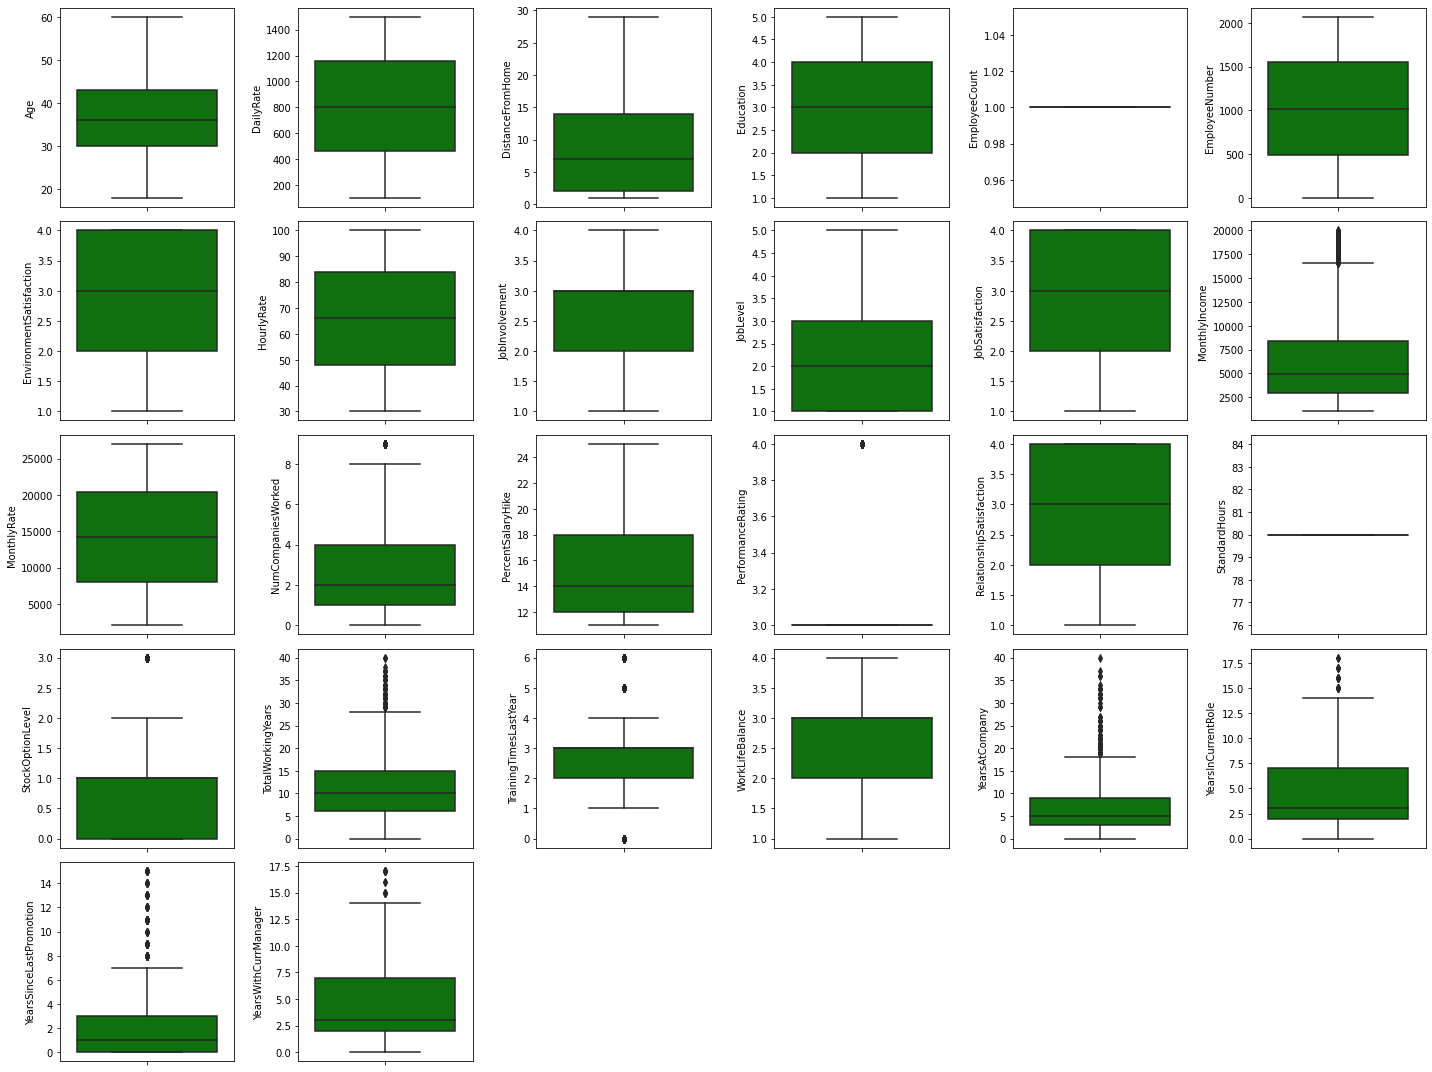

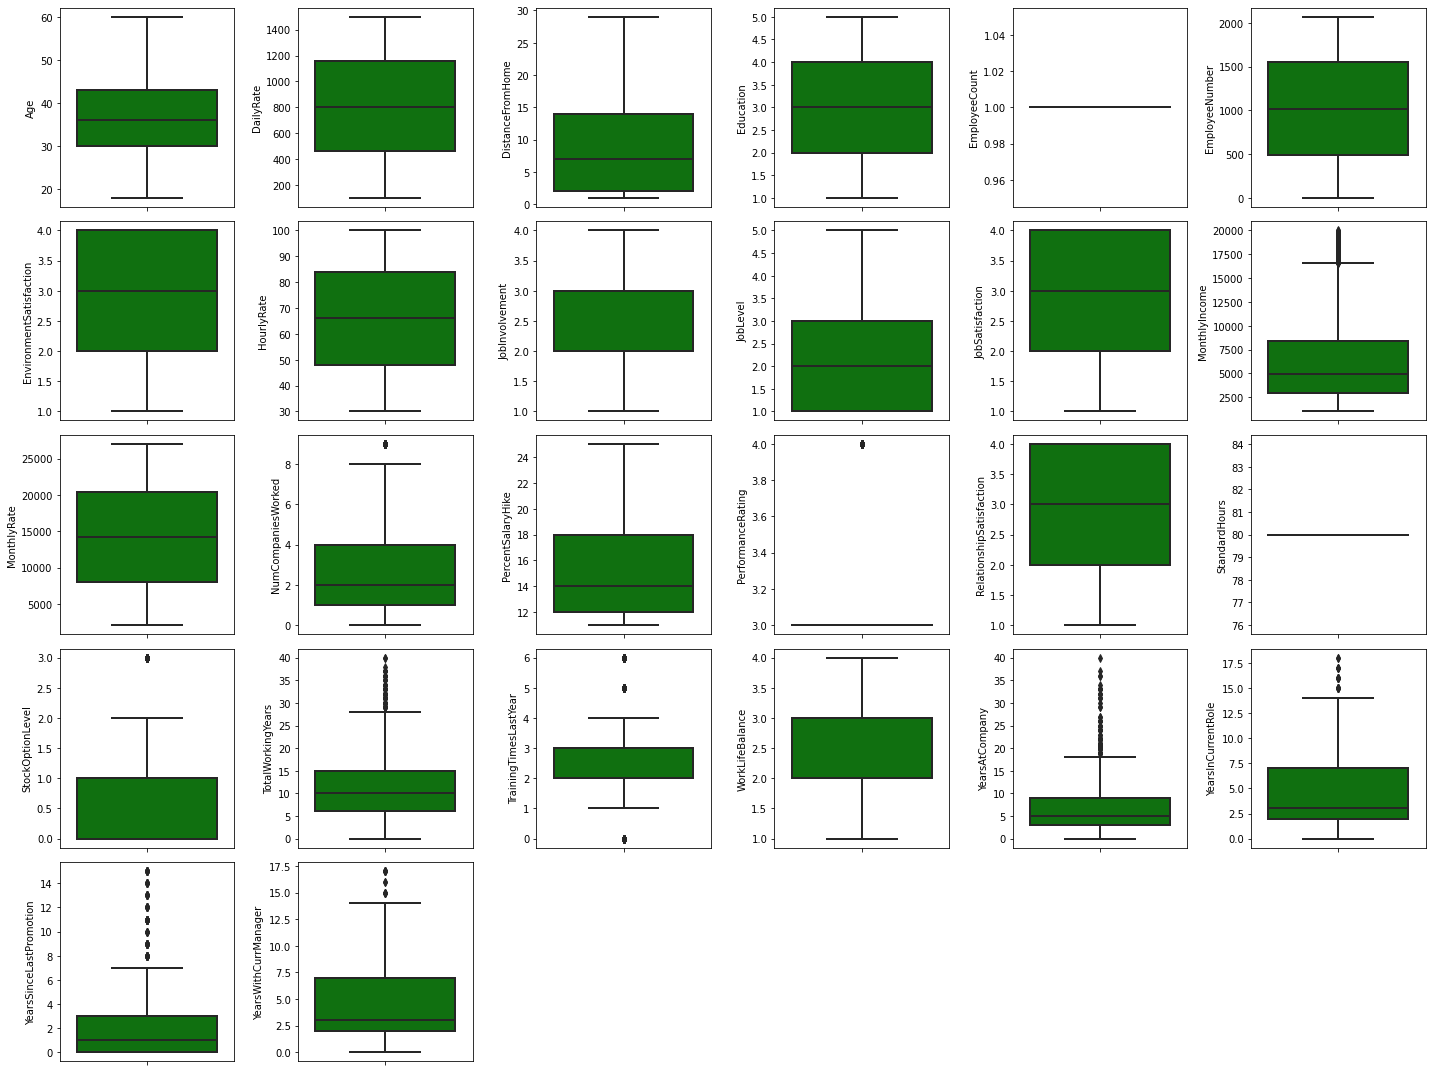

In [ ]:
features = numer1
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
    plt.subplot(5, 6,  i+1)
    sns.boxplot(y = use_df[features[i]], color='green', orient='v')
    plt.tight_layout()

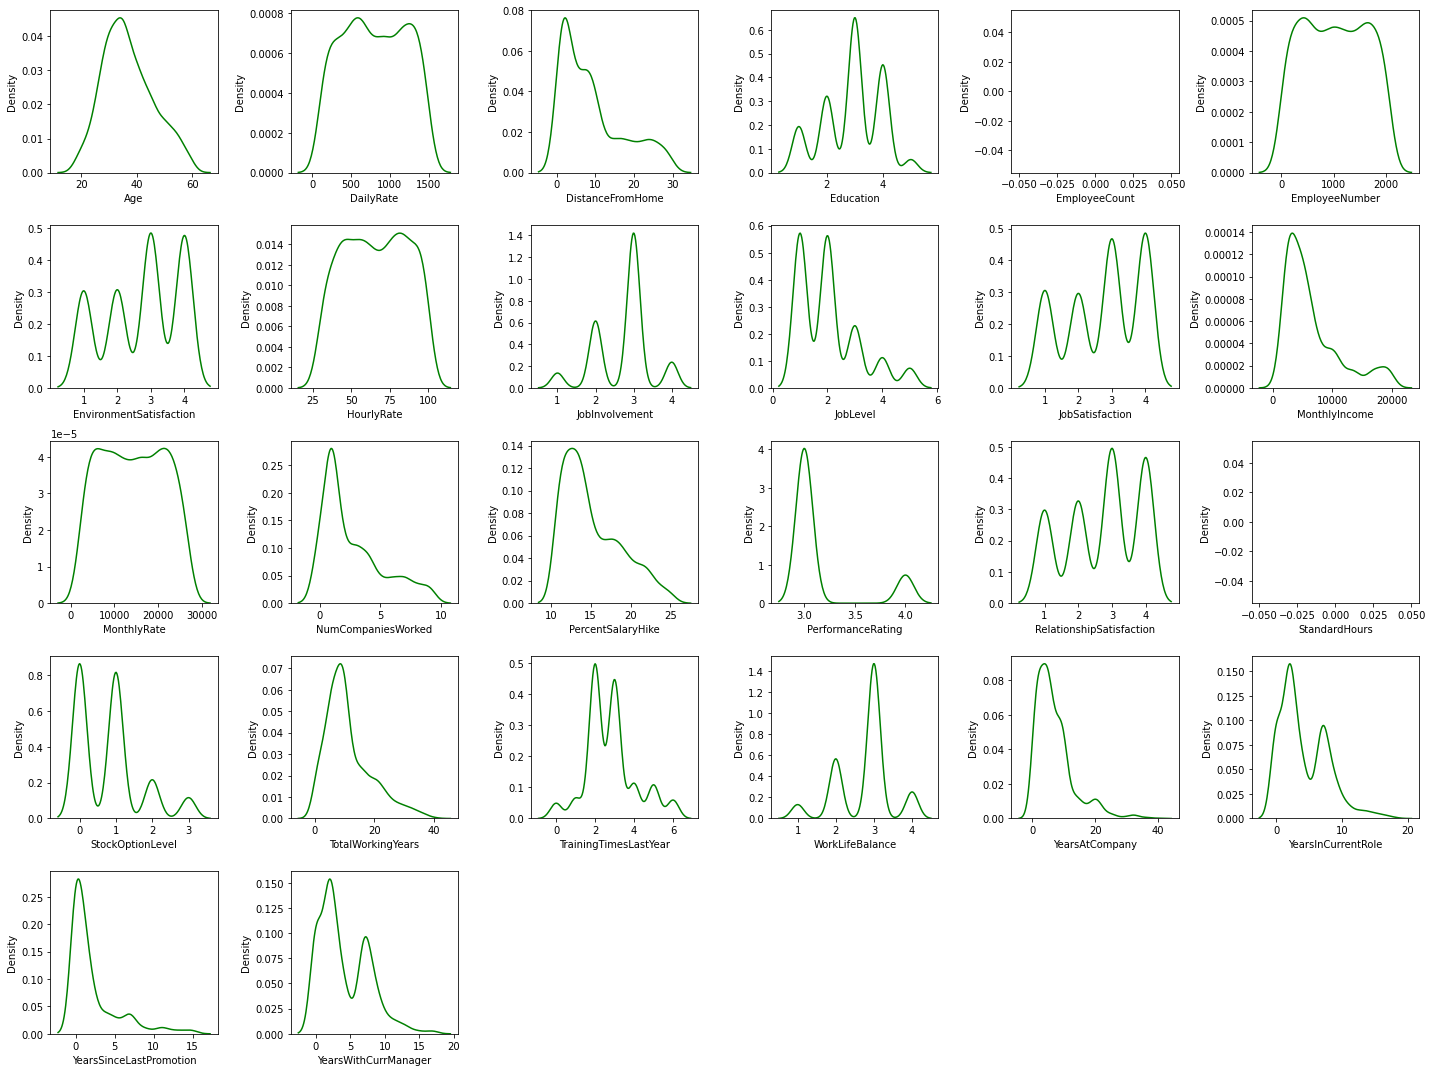

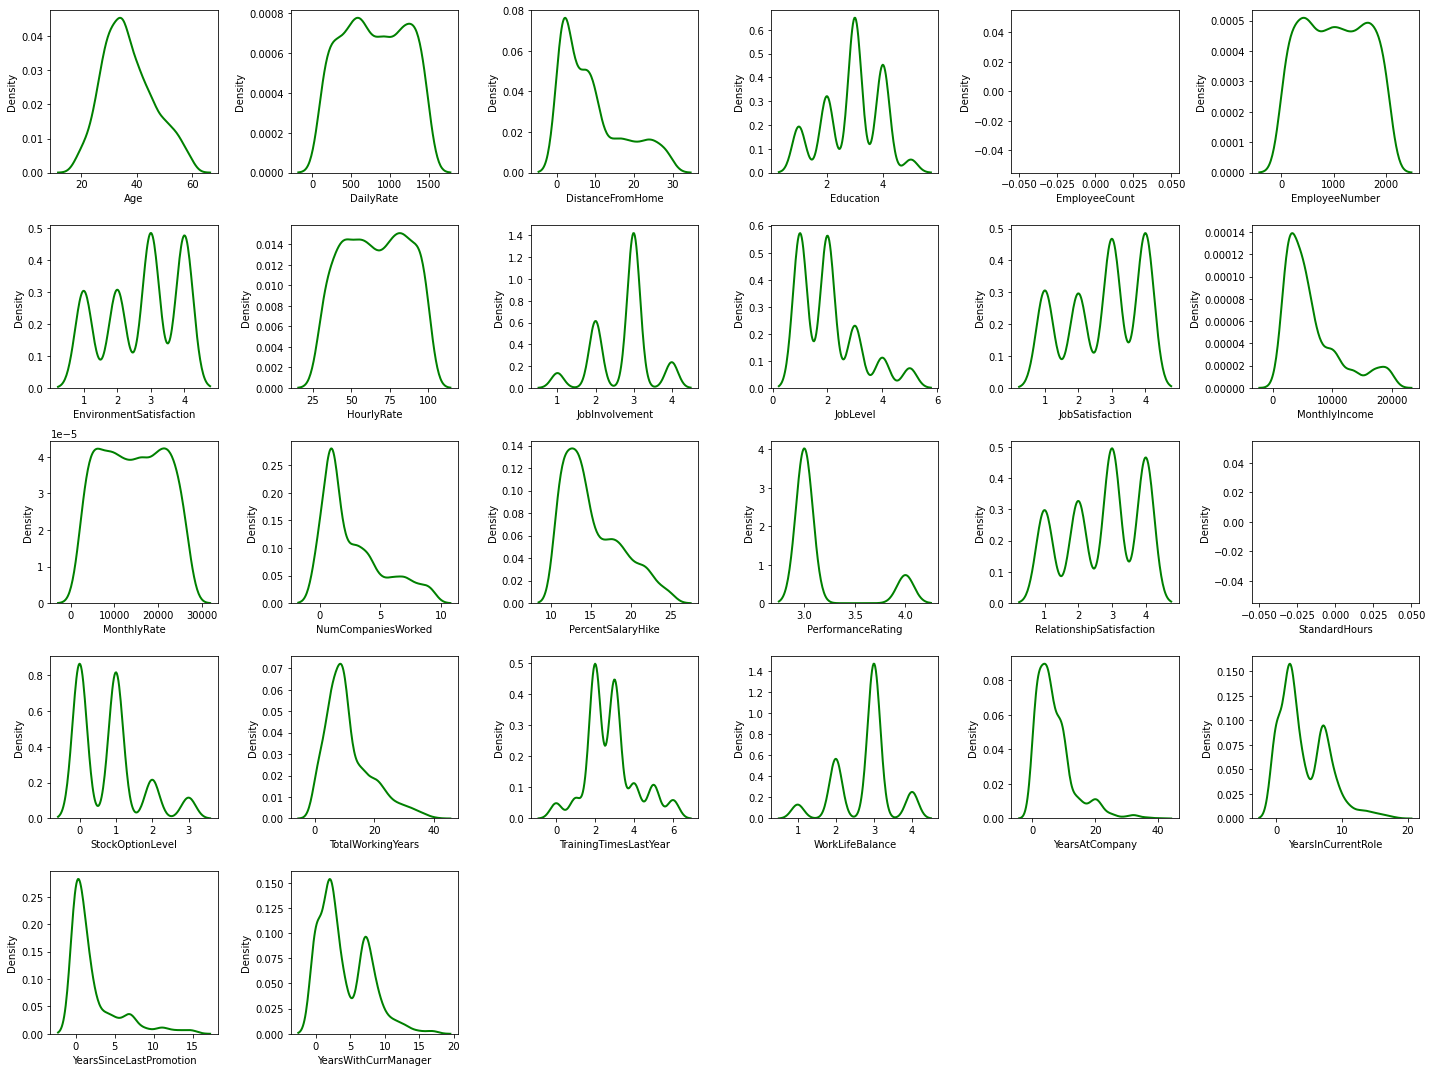

In [ ]:
features = numer1
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
    plt.subplot(5, 6,  i+1)
    sns.kdeplot(x = use_df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

### Descriptive Statistics

In [ ]:
use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
use_df.describe(include = [np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
use_df.describe(include = [object])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### Observasi Univariate Analysis
1. **Tidak ada data** yang berdistribusi normal 
2. Feature DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion memiliki **positively skew.**
3. **Outlier** ada pada feature MonthlyIncome, NumCompaniesWorked, StockedOptionLevel, TotalWorkingYears, TrainingTimesLastYears, YearsAtCompany, YearsCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
**Solusi** :
1. Perlu adanya normalisasi data
2. Penghapusan data outlier

### Multivariate Analysis

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 8
rcParams['lines.linewidth'] = 2

**Grafik korelasi keseluruhan**

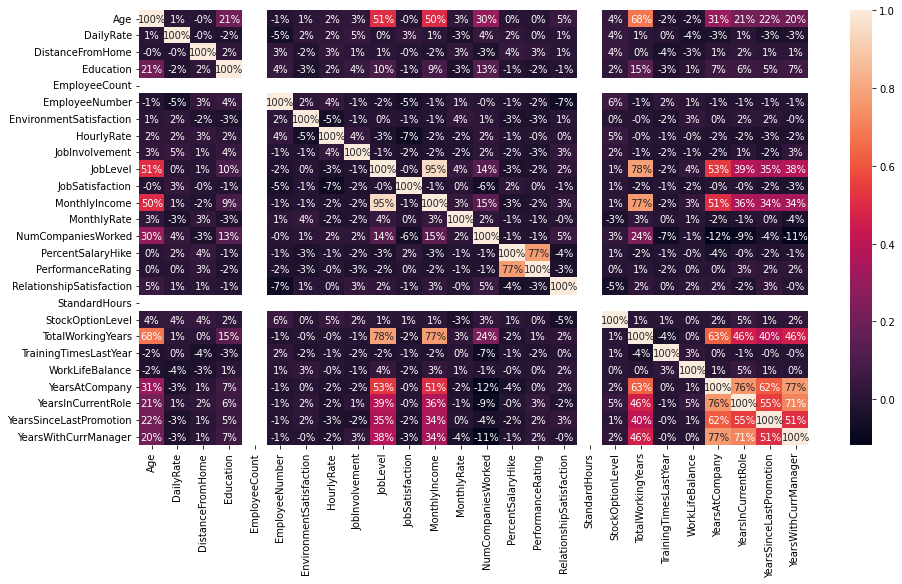

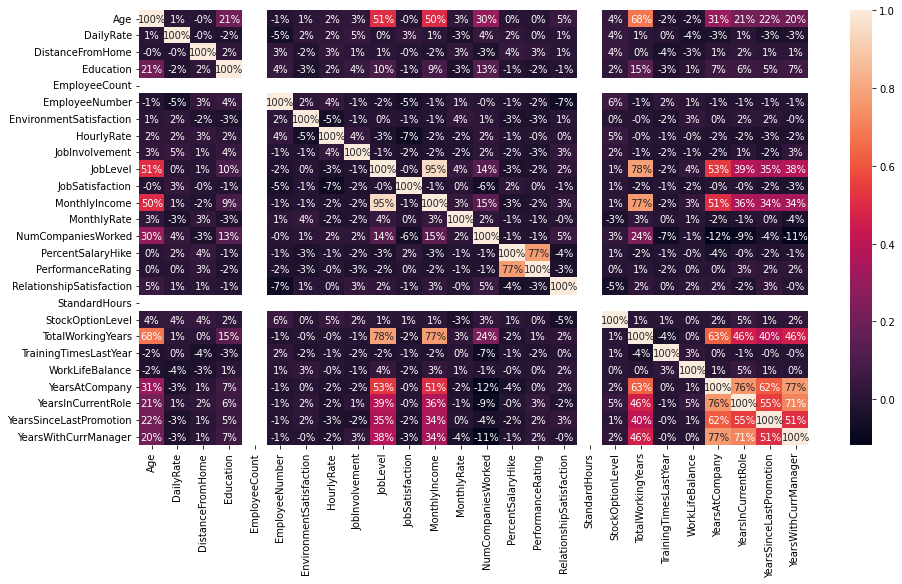

In [ ]:
sns.heatmap(use_df.corr(), annot=True, fmt='.0%');

**Perbandingan jumlah karyawan attrition berdasarkan kolom kategori** 

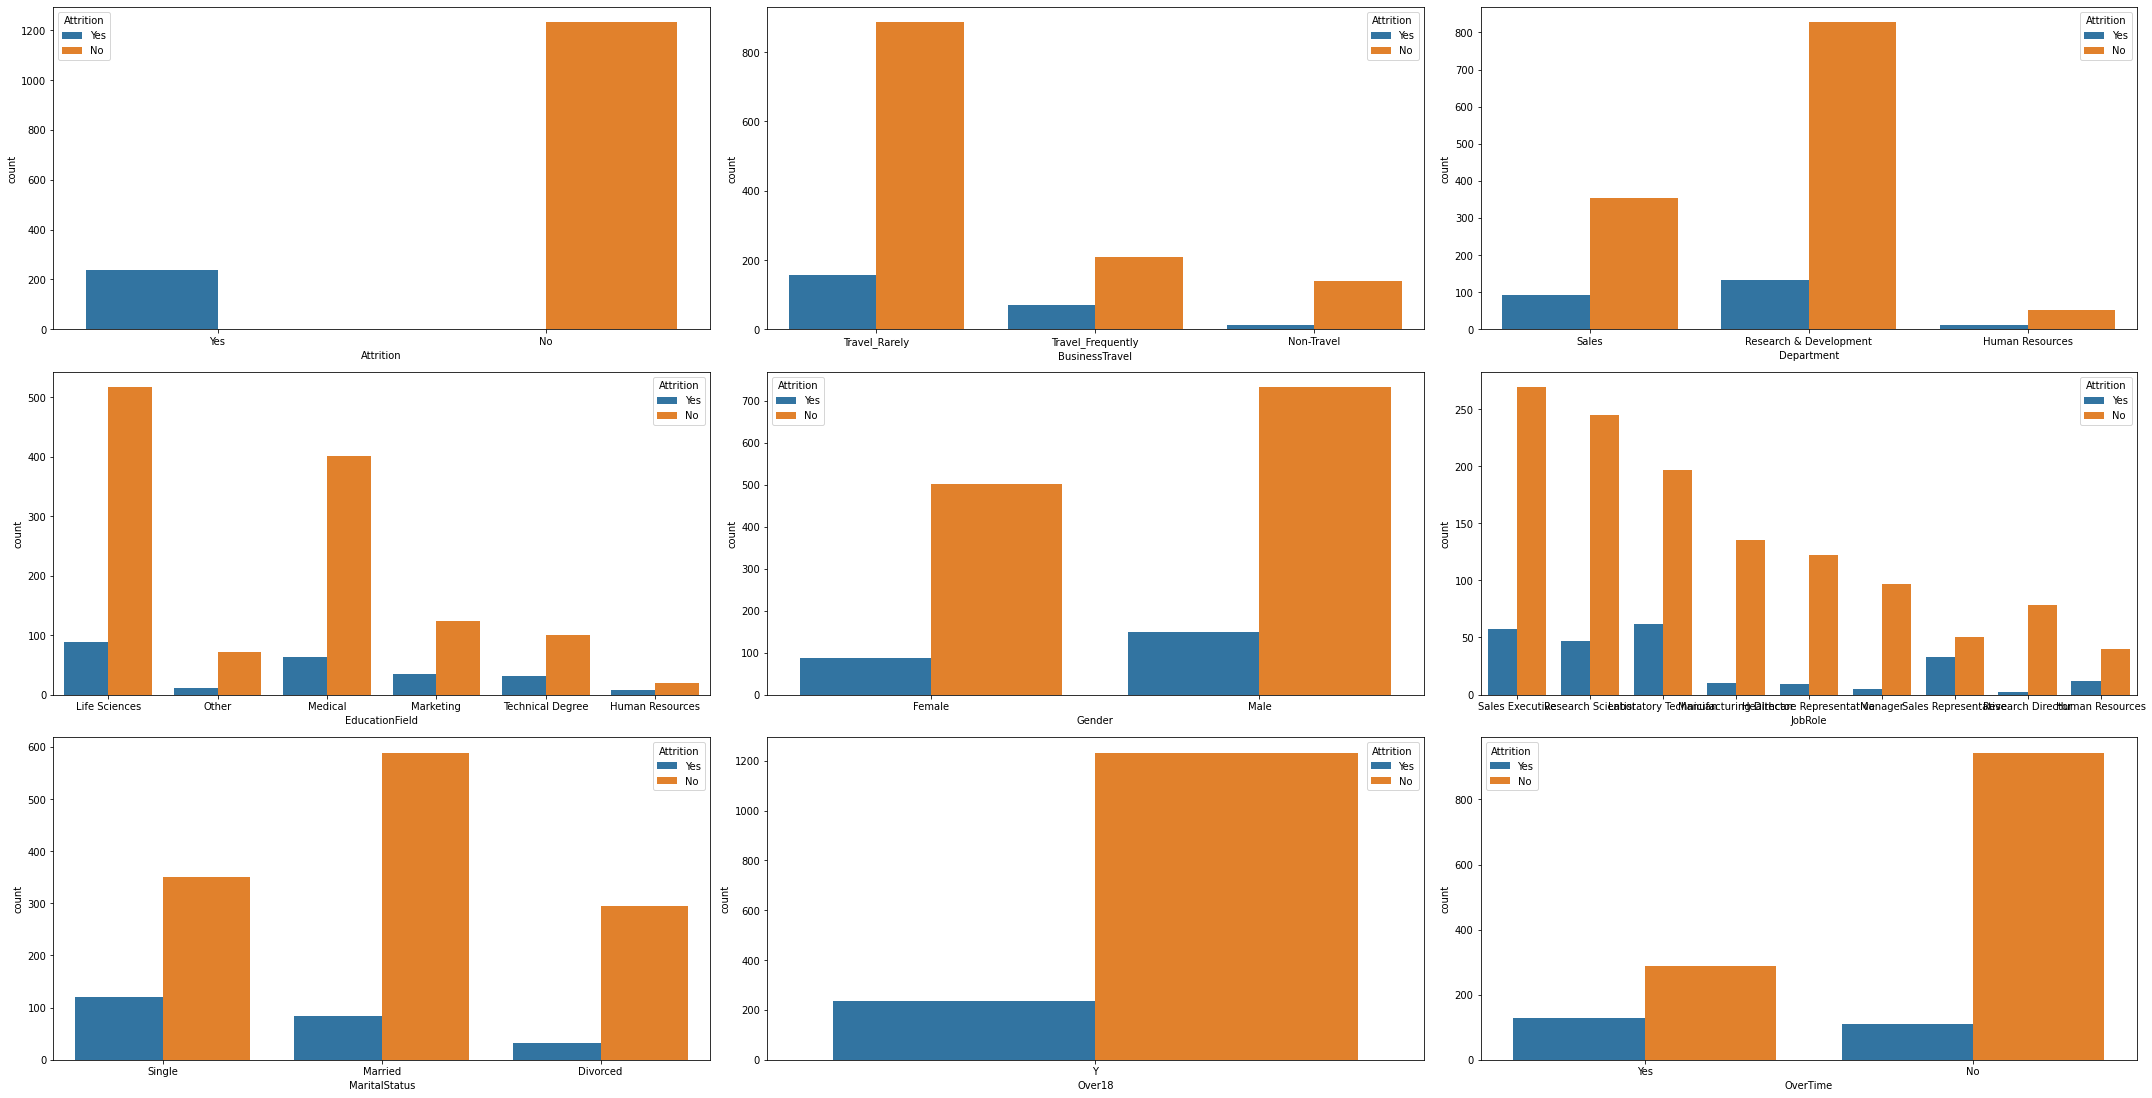

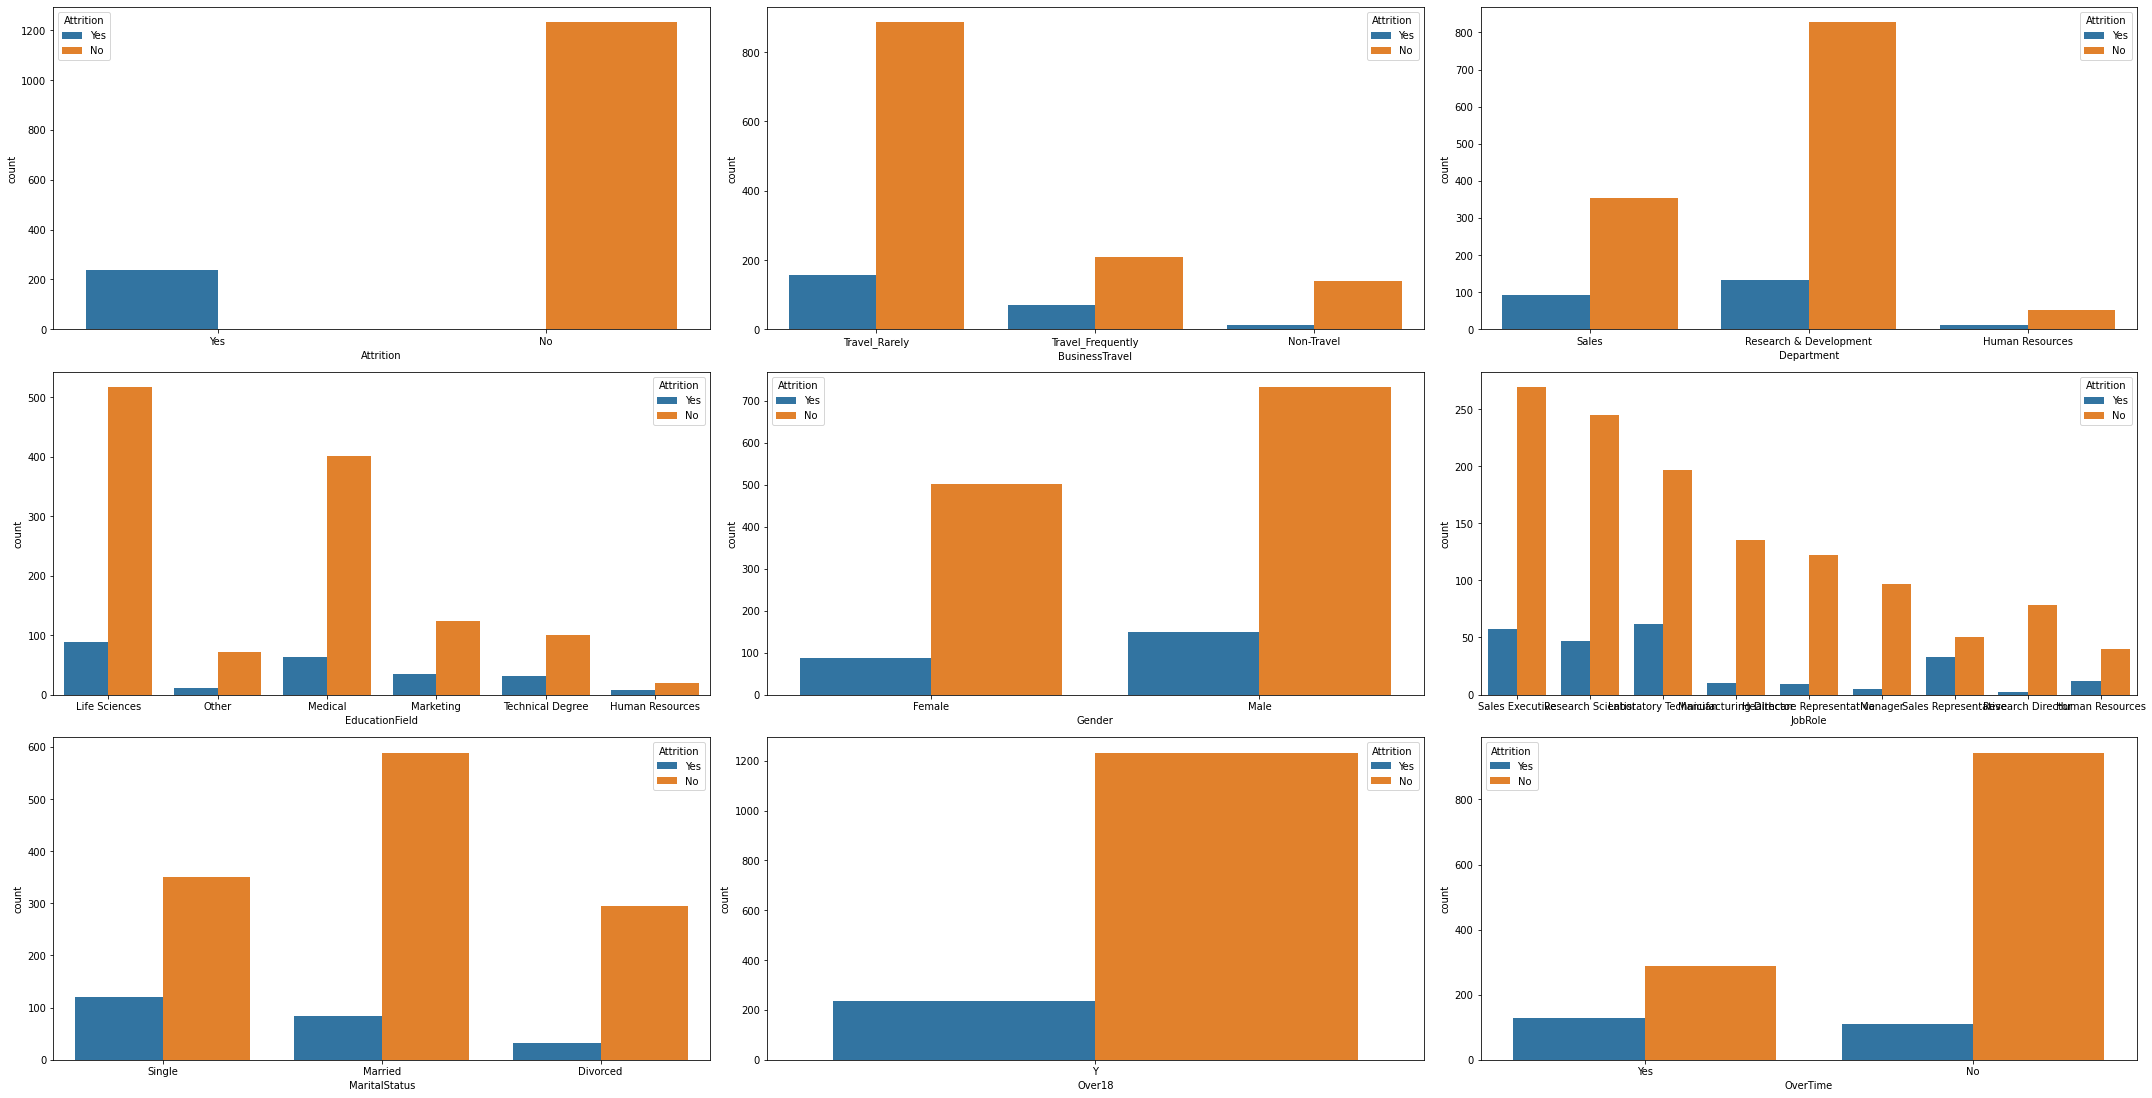

In [ ]:
features = objek
plt.figure(figsize=(30, 20))
for i in range(0, len(features)):
    plt.subplot(4, 3, i+1)
    sns.countplot(x = use_df[features[i]], hue='Attrition', data = use_df)
    plt.tight_layout()

In [ ]:
female = (87/(588))*100
male = (150/(882))*100
print(female)
print(male)

14.795918367346939
17.006802721088434
14.795918367346939
17.006802721088434


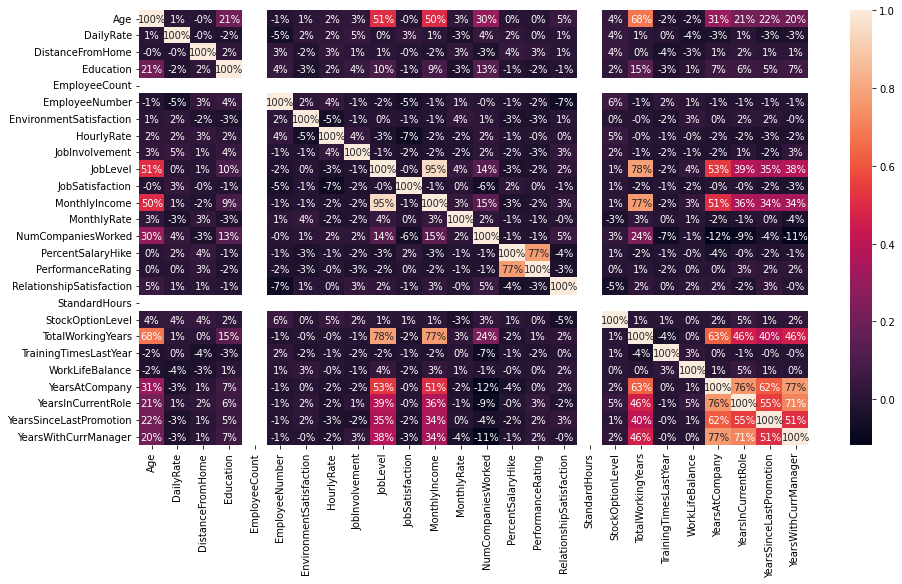

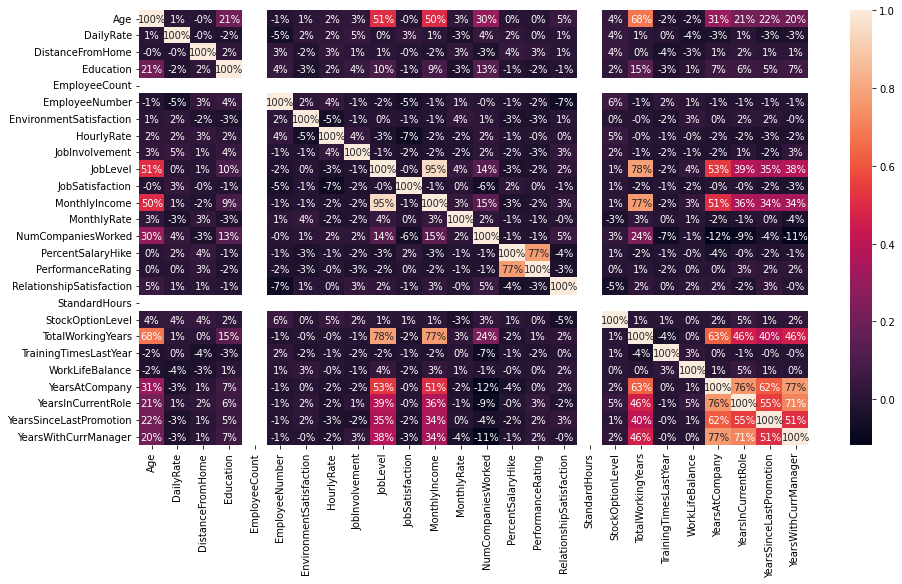

In [ ]:
sns.heatmap(use_df.corr(), annot=True, fmt='.0%');

### Observasi Multivariate Analysis 
1.  Karyawan laki-laki lebih sering attrition dibanding karyawan perempuan. Namun, jika dilihat dari data, jumlah karyawan laki-laki dua kali lipat dari jumlah karyawan perempuan (jumlah laki-laki: 882 orang, jumlah perempuan: 588 orang). Perbandingan persentase attrition diantara karyawan laki-laki dan perempuan secara berurutan adalah **17.00% : 14.79%.** Sehingga dapat disimpulkan bahwa jumlah attrition karyawan laki-laki lebih besar dari jumlah attrition karyawan perempuan.
2. Karyawan dengan joblevel 1 cenderung memiliki persentas attrition lebih tinggi.
3. Usia memiliki korelasi positif yang cukup tinggi terhadap MonthlyIncome (50%) dan JobLevel (51%).
4. JobLevel dan TotalWorkingYears memiliki korelasi positif yang paling tinggi yaitu 78%.

## **INSIGHT AND VISUALIZATION**

In [ ]:
yes = use_df[use_df['Attrition'] == 'Yes']
no = use_df[use_df['Attrition'] == 'No']

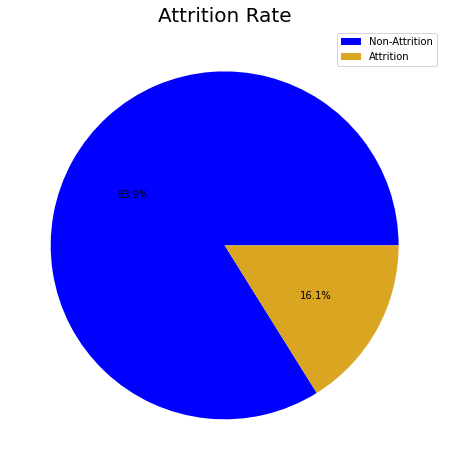

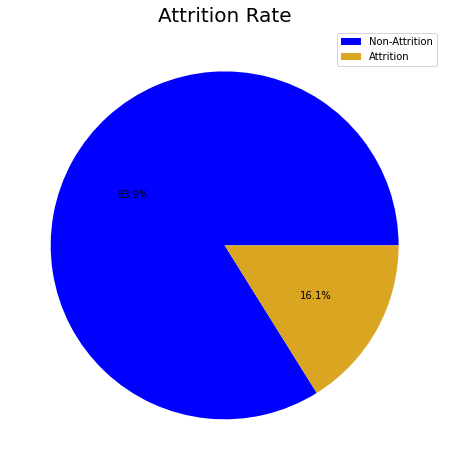

In [ ]:
fig = plt.figure(figsize=(10,8))

#first row, first column
plt.pie(pd.Series(use_df['Attrition']).value_counts(), autopct='%1.1f%%', colors = ['blue', 'goldenrod'])
plt.title('Attrition Rate', color='Black', fontsize=20)
plt.legend(['Non-Attrition','Attrition'])

### Gender

In [ ]:
gender = use_df.groupby(['Attrition', 'Gender'])['EmployeeNumber'].nunique().reset_index()
gender_1 = use_df.groupby(['Gender'])['EmployeeNumber'].nunique().reset_index(name='AllUnique')
gender= gender.merge(gender_1, on='Gender')
gender['Percentage']= round(gender['EmployeeNumber']*100/gender['AllUnique'],2)
gender

,Attrition,Gender,EmployeeNumber,AllUnique,Percentage
0,No,Female,501,588,85.20
1,Yes,Female,87,588,14.80
2,No,Male,732,882,82.99
3,Yes,Male,150,882,17.01


,Attrition,Gender,EmployeeNumber,AllUnique,Percentage
0,No,Female,501,588,85.20
1,Yes,Female,87,588,14.80
2,No,Male,732,882,82.99
3,Yes,Male,150,882,17.01


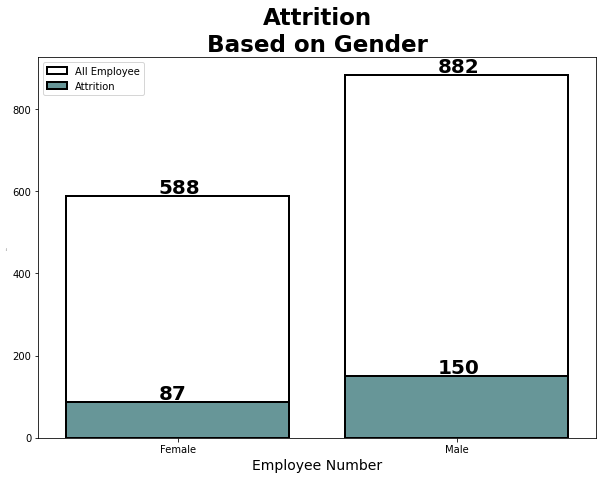

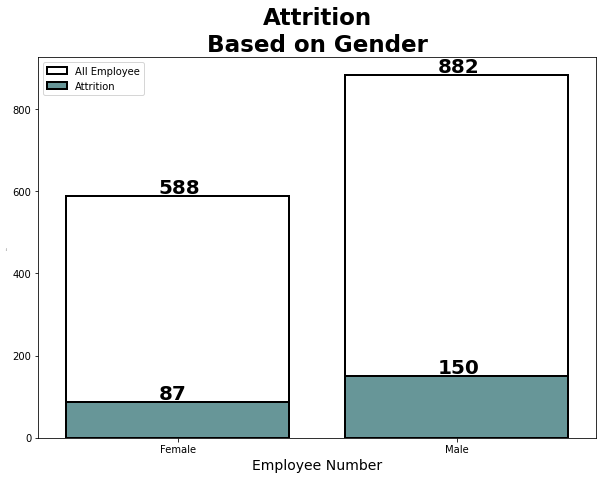

In [ ]:
gender_total  = gender.groupby('Gender').agg({'Percentage':'sum', 'EmployeeNumber' :'sum'}).reset_index()
gender_attrition = gender[gender['Attrition'] == 'Yes']

plt.figure(figsize=(10,7))
g = sns.barplot(x= 'Gender', y= 'EmployeeNumber', data=gender_total, 
                color='white',
                edgecolor= 'black', 
                linewidth = 2
                ,label = 'All Employee')

g = sns.barplot(x= 'Gender', y= 'EmployeeNumber', data=gender[gender['Attrition']=='Yes'], 
                color = 'cadetblue',
                edgecolor= 'black', 
                linewidth = 2,
                label = 'Attrition')

plt.title('Attrition\nBased on Gender', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold')

for x, y in enumerate(gender_total['EmployeeNumber']) :
  g.text(x - 0.07, y + 6 , y, fontsize = '20', fontweight = 'bold')

for x, y in enumerate(gender_attrition['EmployeeNumber']) :
  g.text(x - 0.07, y + 6 ,y , fontsize = '20', fontweight = 'bold')

plt.legend()

plt.xlabel('Employee Number', fontsize=14)
plt.ylabel('Attrition', fontsize=1)
plt.show()

# Dari Total 588 Perempuan Di Perusahaan 87 Attrition
# Dari Total 882 Pria Di Perusahaan 150 Attrition

#### Insight Attrition Employee Number based on Gender

1. Proporsi jumlah karyawan laki-laki dan perempuan yang melakukan attrition  antara lain
   Laki-laki = 17.01%
   Perempuan = 14.80%
2. Karyawan yang melakukan attrition didominasi oleh Laki-laki

### Job Level

Adanya Hubungan Job Level dengan Involvement

In [ ]:
df_job_level = use_df.groupby(['JobLevel','JobInvolvement','MonthlyIncome','Attrition']).agg({'EmployeeNumber' : 'count'}).reset_index()
df_job_level['Level Involvement'] = df_job_level['JobLevel'].astype('string')+'-'+df_job_level['JobInvolvement'].astype('string')

df_job_level

,JobLevel,JobInvolvement,MonthlyIncome,Attrition,EmployeeNumber,Level Involvement
0,1,1,1118,Yes,1,1-1
1,1,1,1129,No,1,1-1
2,1,1,1359,Yes,1,1-1
3,1,1,1555,Yes,1,1-1
4,1,1,2119,Yes,1,1-1
...,...,...,...,...,...,...
1434,5,3,19943,No,1,5-3
1435,5,4,18722,No,1,5-4
1436,5,4,19190,No,1,5-4
1437,5,4,19202,No,1,5-4


,JobLevel,JobInvolvement,MonthlyIncome,Attrition,EmployeeNumber,Level Involvement
0,1,1,1118,Yes,1,1-1
1,1,1,1129,No,1,1-1
2,1,1,1359,Yes,1,1-1
3,1,1,1555,Yes,1,1-1
4,1,1,2119,Yes,1,1-1
...,...,...,...,...,...,...
1434,5,3,19943,No,1,5-3
1435,5,4,18722,No,1,5-4
1436,5,4,19190,No,1,5-4
1437,5,4,19202,No,1,5-4


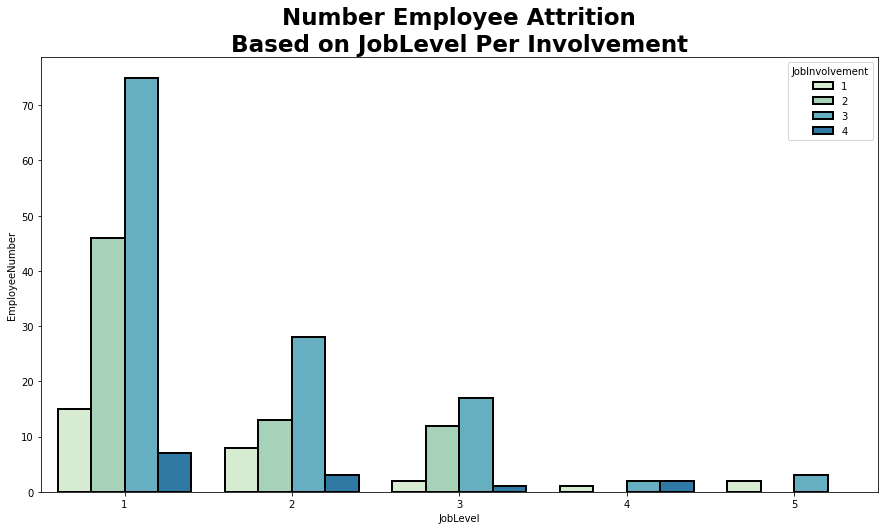

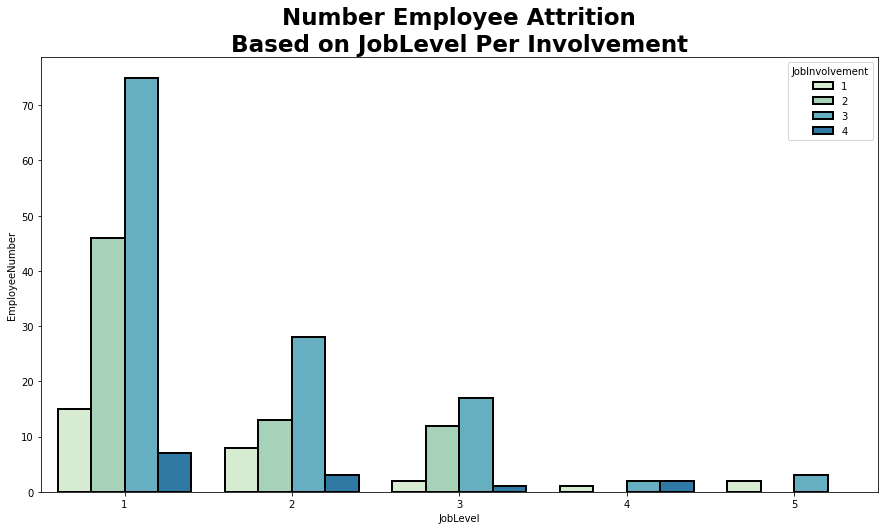

In [ ]:
plt.figure(figsize=(15,8))

data = use_df.groupby(['JobLevel','JobInvolvement','Attrition']).agg({'EmployeeNumber' : 'count'}).reset_index()
data_attrition = data[data['Attrition'] == 'Yes']

g = sns.barplot(x = 'JobLevel', y = 'EmployeeNumber',
                hue = 'JobInvolvement',
                palette = 'GnBu' ,
                edgecolor= 'black',
                linewidth = 2,
                data = data_attrition)

plt.legend(title = 'JobInvolvement',loc = 'upper right')
plt.title('Number Employee Attrition\nBased on JobLevel Per Involvement', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold')

plt.show()

#### Insight Jumlah Karyawan Atrisi Berdasarkan Job Level Per Job Involvement

1. Semakin Tinggi Job Level Semakin Sedikit Karyawan.
2. Jika Dilihat Job Involvement 3 Selalu Menjadi yang Paling Tinggi.
3. Pada Job Level 1 dan 2 Memiliki Jumlah Karyawan dan Job Involvement yang Sama. Tetapi, Karyawan yang Mengalami Attrisi Pada Job Level 1 Berjumlah 2 Kali Lipat Dari Job Level 2.

### Percent Salary Hike - Job Involvement

In [ ]:
hike = use_df.groupby('JobInvolvement').agg({'PercentSalaryHike': ['mean','median','min','max']}).reset_index()
hike.columns = ['JobInvolvement','mean_sh', 'median_sh','min_sh','max_sh']

(0.0, 20.0)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


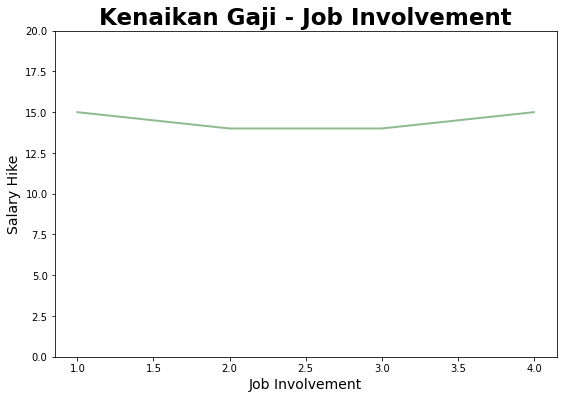

(0.0, 20.0)

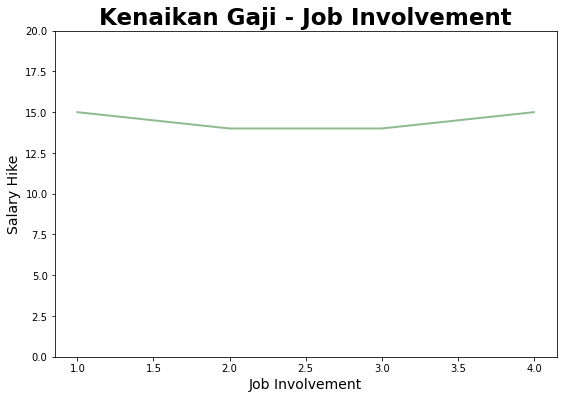

In [ ]:
x = hike['JobInvolvement']
y = hike['median_sh']

plt.figure(figsize=(9,6))

grafik=sns.lineplot(x=x, y=y, data=hike,
                   color='darkseagreen',
                   #edgecolor= 'black',
                   linewidth = 2)

plt.title('Kenaikan Gaji - Job Involvement', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold',
          fontname="Cambria")

plt.xlabel('Job Involvement', fontsize=14)
plt.ylabel('Salary Hike', fontsize=14)


plt.ylim(0, 20)

#### Insight Korelasi Job Involment dengan Salary Hike

1. Beban kerja yang diberikan tidak menimbulkan tingginya kenaikan gaji.

### Business Travel

In [ ]:
df_business_travel = use_df.groupby(['BusinessTravel','JobLevel','Attrition']).agg({'EmployeeNumber' : 'count'}).reset_index()
df_business_travel_yes = df_business_travel[df_business_travel['Attrition']=='Yes']
df_business_travel_yes

,BusinessTravel,JobLevel,Attrition,EmployeeNumber
1,Non-Travel,1,Yes,6
3,Non-Travel,2,Yes,3
5,Non-Travel,3,Yes,2
7,Non-Travel,4,Yes,1
10,Travel_Frequently,1,Yes,45
12,Travel_Frequently,2,Yes,15
14,Travel_Frequently,3,Yes,6
16,Travel_Frequently,4,Yes,3
19,Travel_Rarely,1,Yes,92
21,Travel_Rarely,2,Yes,34


,BusinessTravel,JobLevel,Attrition,EmployeeNumber
1,Non-Travel,1,Yes,6
3,Non-Travel,2,Yes,3
5,Non-Travel,3,Yes,2
7,Non-Travel,4,Yes,1
10,Travel_Frequently,1,Yes,45
12,Travel_Frequently,2,Yes,15
14,Travel_Frequently,3,Yes,6
16,Travel_Frequently,4,Yes,3
19,Travel_Rarely,1,Yes,92
21,Travel_Rarely,2,Yes,34


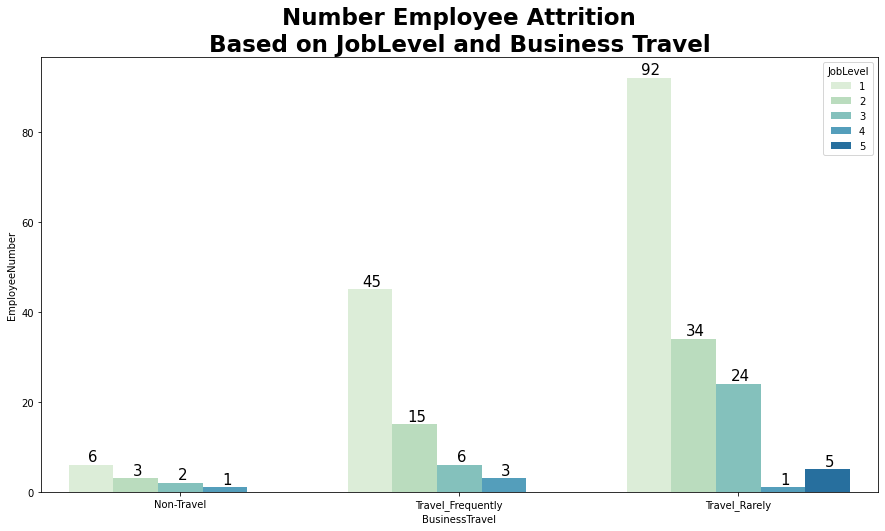

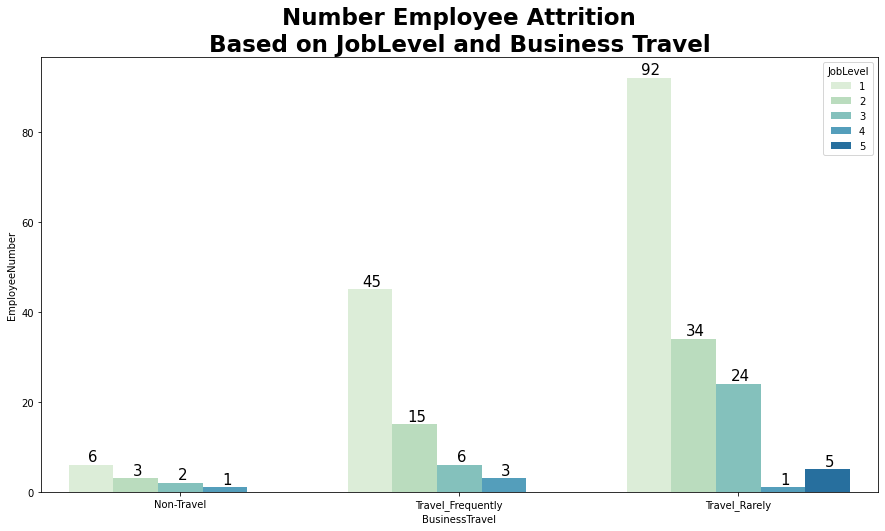

In [ ]:
plt.figure(figsize=(15,8))

g = sns.barplot(x = 'BusinessTravel', y = 'EmployeeNumber',
                hue = 'JobLevel',
                palette = 'GnBu' ,
                linewidth = 2,
                data = df_business_travel_yes)

for bar in g.patches:
  g.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(2, 8),
                   textcoords='offset points')


plt.legend(title = 'JobLevel',loc = 'upper right')
plt.title('Number Employee Attrition\nBased on JobLevel and Business Travel', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold')

plt.show()

#### Insight Kolerasi Business Travel dengan Job Level
1. Karyawan yang atrisi adalah kebanyakan yang pernah hingga sering melakukan business travel dengan job level 1

### Total Working Years

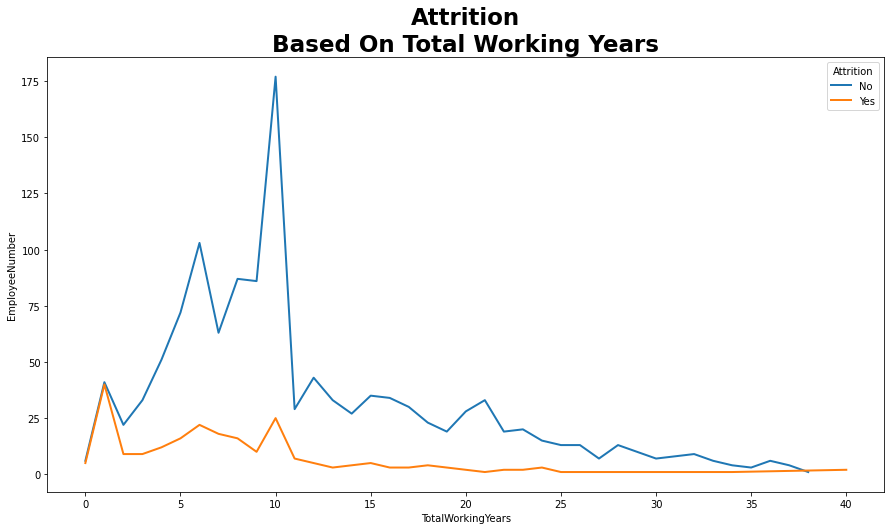

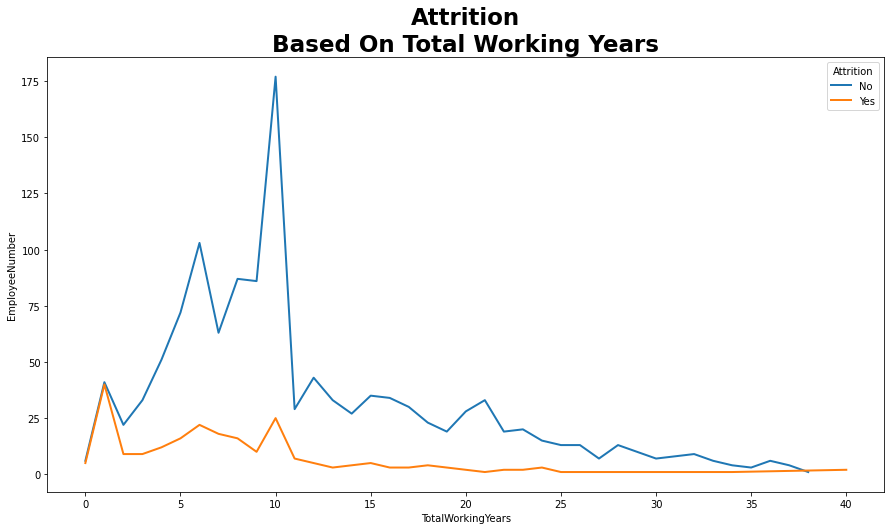

In [ ]:
df_total_working_years = use_df.groupby(['TotalWorkingYears', 'Attrition']).agg({'EmployeeNumber' : 'count'}).reset_index()

plt.figure(figsize=(15,8))
sns.lineplot(x = 'TotalWorkingYears',y = 'EmployeeNumber',hue = 'Attrition',data = df_total_working_years)
plt.title('Attrition\nBased On Total Working Years', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold')
plt.show()

#### Insight Korelasi Total Working Years dengan Attrition Karyawan

1. Jika Dilihat Dari Persebarannya Maka Untuk Pekerja Dengan Total Working Years 0 Tahun Hingga 1 -2 Tahun Tahun Memiliki Kecenderungan Attrition Paling Tinggi

### Stock Option - Attrition Karyawan

In [ ]:
df_stock_option_yes = use_df[use_df['Attrition'] == 'Yes'].groupby(['StockOptionLevel']).agg({'EmployeeCount' : 'count'}).reset_index()
df_stock_option_no = use_df[use_df['Attrition'] == 'No'].groupby(['StockOptionLevel']).agg({'EmployeeCount' : 'count'}).reset_index()
df_stock_option_total = use_df.groupby(['StockOptionLevel']).agg({'EmployeeCount' : 'sum'}).reset_index()
df_stock_option_total['Attrition'] = df_stock_option_total['EmployeeCount'] - df_stock_option_no['EmployeeCount']
df_stock_option_total['Non Attrition'] = df_stock_option_total['EmployeeCount'] - df_stock_option_yes['EmployeeCount']

df_stock_option_total

,StockOptionLevel,EmployeeCount,Attrition,Non Attrition
0,0,631,154,477
1,1,596,56,540
2,2,158,12,146
3,3,85,15,70


,StockOptionLevel,EmployeeCount,Attrition,Non Attrition
0,0,631,154,477
1,1,596,56,540
2,2,158,12,146
3,3,85,15,70


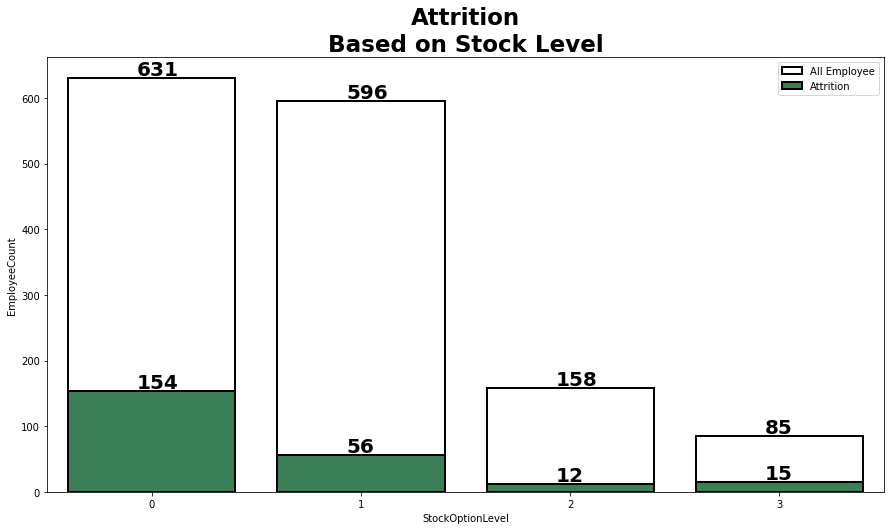

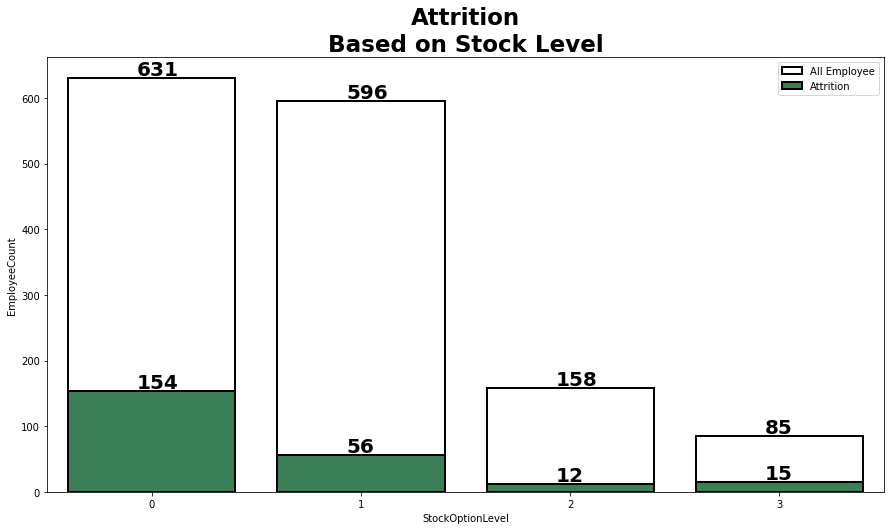

In [ ]:
plt.figure(figsize=(15,8))
g = sns.barplot(x = 'StockOptionLevel', y = 'EmployeeCount', data = df_stock_option_total,
            color = 'white',
            edgecolor = 'black',
            linewidth = 2,
            label = 'All Employee')

g = sns.barplot(x = 'StockOptionLevel', y = 'EmployeeCount',data = df_stock_option_yes, 
            color = 'seagreen',
            edgecolor = 'black',
            linewidth = 2,
            label = 'Attrition')

for x, y in enumerate(df_stock_option_yes['EmployeeCount']) :
  g.text(x - 0.07, y + 4, y, fontsize = '20', fontweight = 'bold')

for x, y in enumerate(df_stock_option_total['EmployeeCount']) :
  g.text(x - 0.07, y + 4 ,y , fontsize = '20', fontweight = 'bold')

plt.legend()
plt.title('Attrition\nBased on Stock Level', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold')
plt.show()

#### Insight Korelasi Stock Option dengan Monthly Income Berdasarkan Job Level

1. Karyawan Dari Seluruh Level Dapat Memiliki Stock Option
2. Karyawan yang Mengambil Stock Option Tidak Mengurangi Monthly Income Yang Diterimanya.
3. Karyawan yang Attrition Kebanyakan Tidak Mengambil Stock Option

### Department

In [ ]:
depart = use_df.groupby(['Department'])['EmployeeNumber'].nunique().reset_index(name='all')
depart1 = yes.groupby(['Department'])['EmployeeNumber'].nunique().reset_index(name='attrition')
depart = depart.merge(depart1, on='Department').sort_values('all', ascending=False)
depart['percentage'] = depart['attrition']*100/depart['all']
depart

,Department,all,attrition,percentage
1,Research & Development,961,133,13.839750
2,Sales,446,92,20.627803
0,Human Resources,63,12,19.047619


,Department,all,attrition,percentage
1,Research & Development,961,133,13.839750
2,Sales,446,92,20.627803
0,Human Resources,63,12,19.047619


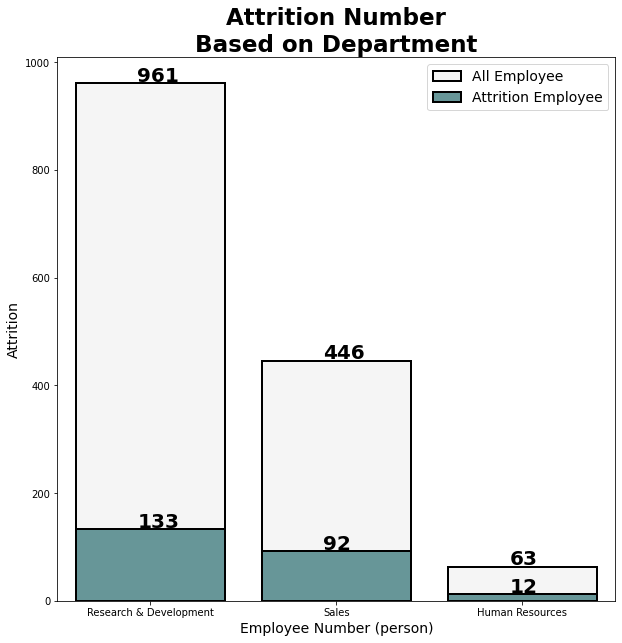

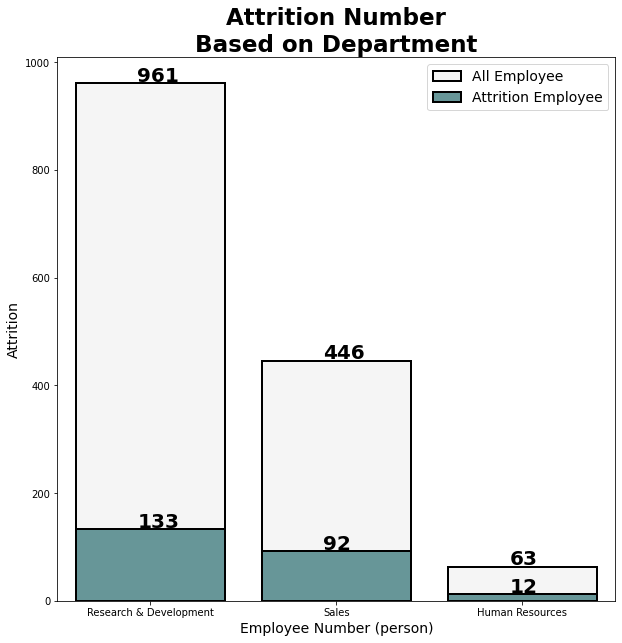

In [ ]:
plt.figure(figsize=(10,10))

g = sns.barplot(x='Department', y='all', data=depart, 
                color = 'whitesmoke',
                edgecolor='black',
                linewidth = 2,
                label = 'All Employee')

g = sns.barplot(x='Department', y='attrition', data=depart, 
                color = 'cadetblue',
                edgecolor='black',
                linewidth = 2,
                label = 'Attrition Employee')

plt.title('Attrition Number\nBased on Department', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold',
          fontname="Cambria")

for x, y in enumerate(depart['all']) :
  g.text(x - 0.07, y + 4, y, fontsize = '20', fontweight = 'bold')

for x, y in enumerate(depart['attrition']) :
  g.text(x - 0.07, y + 4 ,y , fontsize = '20', fontweight = 'bold')

plt.xlabel('Employee Number (person)', fontsize=14)
plt.ylabel('Attrition', fontsize=14)

plt.legend(fontsize=14)


#### Insight Sebaran Karyawan dari Department yang melakukan Attrition

Karyawan yang melakukan Attritition paling banyak berasal dari department RnD dan Sales,dengan jumlah 133 dan 92 orang. Namun, jika berdasarkan proporsinya, attrition yang tinggi terjadi pada department Sales dan HR dengan persentase 20.6% dan 19.0%.

### Environtment Satisfaction in HR and Sales Department

In [ ]:
envi = use_df[((use_df['Department'] =='Human Resources')
           |(use_df['Department'] =='Sales'))
           &(use_df['Attrition'] == 'Yes')]
envi

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
33,39,Yes,Travel_Rarely,895,Sales,5,3,Technical Degree,1,42,...,3,80,1,19,6,4,1,0,0,0
36,50,Yes,Travel_Rarely,869,Sales,3,2,Marketing,1,47,...,3,80,0,3,2,3,3,2,0,2
89,46,Yes,Travel_Rarely,669,Sales,9,2,Medical,1,118,...,4,80,0,9,3,3,9,8,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,31,Yes,Travel_Frequently,754,Sales,26,4,Marketing,1,1967,...,3,80,0,10,4,3,10,7,0,8
1396,53,Yes,Travel_Rarely,1168,Sales,24,4,Life Sciences,1,1968,...,2,80,0,15,2,2,2,2,2,2
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
33,39,Yes,Travel_Rarely,895,Sales,5,3,Technical Degree,1,42,...,3,80,1,19,6,4,1,0,0,0
36,50,Yes,Travel_Rarely,869,Sales,3,2,Marketing,1,47,...,3,80,0,3,2,3,3,2,0,2
89,46,Yes,Travel_Rarely,669,Sales,9,2,Medical,1,118,...,4,80,0,9,3,3,9,8,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,31,Yes,Travel_Frequently,754,Sales,26,4,Marketing,1,1967,...,3,80,0,10,4,3,10,7,0,8
1396,53,Yes,Travel_Rarely,1168,Sales,24,4,Life Sciences,1,1968,...,2,80,0,15,2,2,2,2,2,2
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1


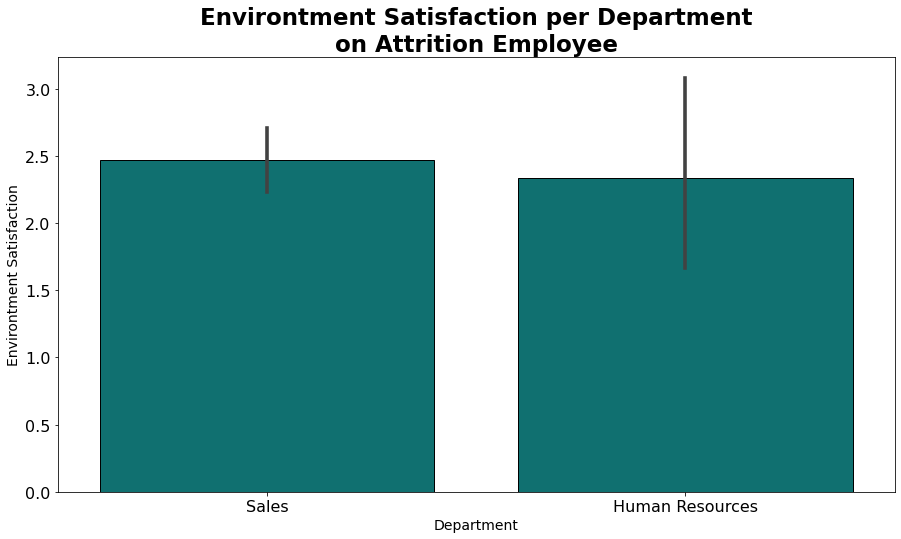

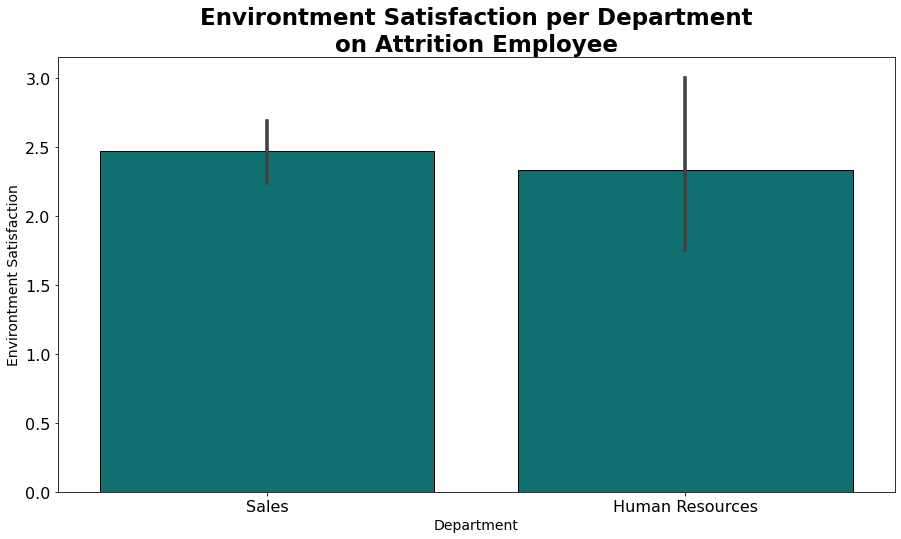

In [ ]:
plt.figure(figsize=(15,8))

g = sns.barplot(x='Department', y='EnvironmentSatisfaction', data=envi, 
                color='teal',
                edgecolor= 'black')

plt.title('Environtment Satisfaction per Department\non Attrition Employee', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold',
          fontname="Cambria")

plt.xlabel('Department', fontsize=14)
plt.ylabel('Environtment Satisfaction', fontsize=14)
plt.tick_params(labelsize = 16)

#### Insight Environtment Satisfaction per Department yang karyawan melakukan Attrition

1. Environtment Satisfaction pada department HR lebih rendah dibanding department Sales. Namun keduanya tidak berbeda jauh.

### Attrition dan Year With Manager

In [ ]:
manager = use_df.groupby(['YearsWithCurrManager'])['EmployeeNumber'].nunique().reset_index(name='all')
manager1 = yes.groupby(['YearsWithCurrManager'])['EmployeeNumber'].nunique().reset_index(name='attrition')
manager = manager.merge(manager1, on='YearsWithCurrManager', how='left')
manager = manager.fillna(0)
manager

,YearsWithCurrManager,all,attrition
0,0,263,85.0
1,1,76,11.0
2,2,344,50.0
3,3,142,19.0
4,4,98,11.0
5,5,31,4.0
6,6,29,4.0
7,7,216,31.0
8,8,107,10.0
9,9,64,6.0


,YearsWithCurrManager,all,attrition
0,0,263,85.0
1,1,76,11.0
2,2,344,50.0
3,3,142,19.0
4,4,98,11.0
5,5,31,4.0
6,6,29,4.0
7,7,216,31.0
8,8,107,10.0
9,9,64,6.0


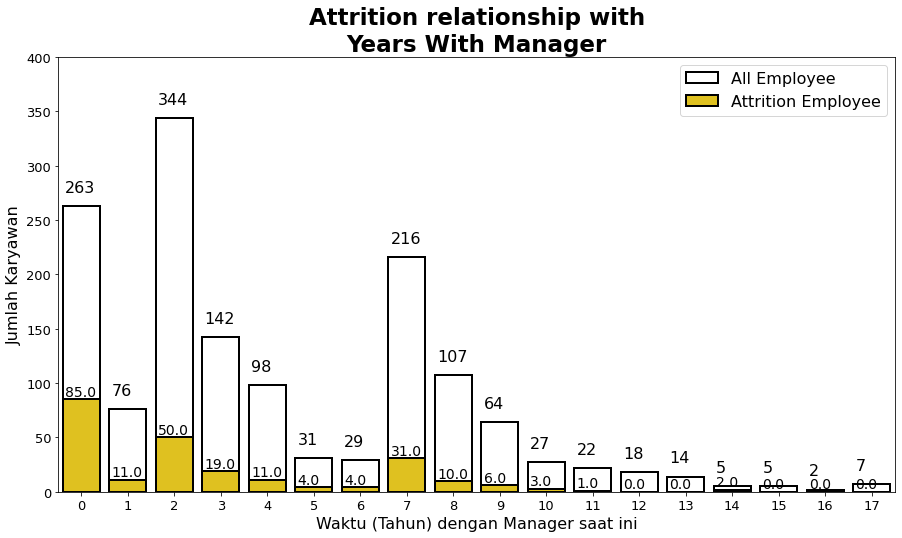

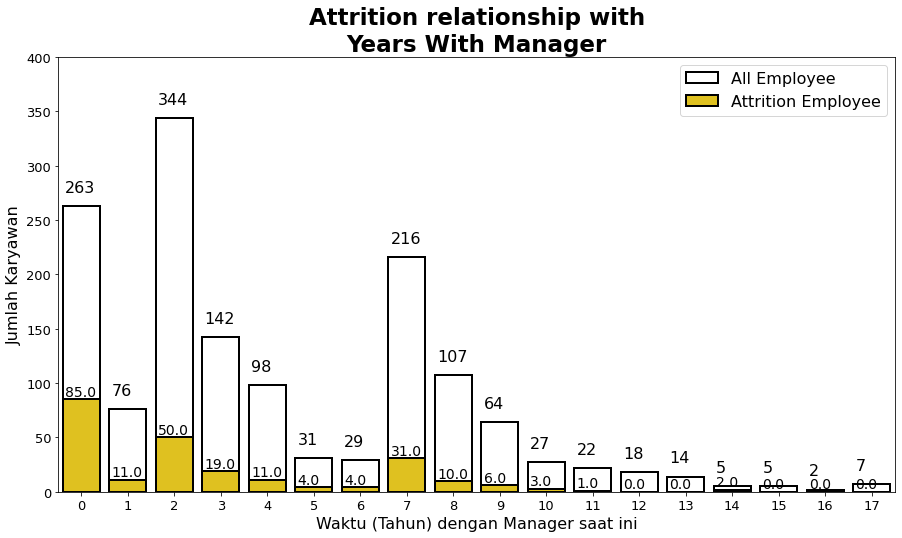

In [ ]:
plt.figure(figsize=(15,8))
g = sns.barplot(x='YearsWithCurrManager', y='all', data=manager, 
                color='white',
                edgecolor= 'black', 
                linewidth = 2,
                label = 'All Employee')

g = sns.barplot(x='YearsWithCurrManager', y='attrition', data=manager, 
                color='gold',
                edgecolor= 'black', 
                linewidth = 2,
                label = 'Attrition Employee')

plt.title('Attrition relationship with\nYears With Manager', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold',
          fontname="Cambria")

for x, y in enumerate(manager['all']) :
  g.text(x-0.35, y+13, y, fontsize = '16')

for x, y in enumerate(manager['attrition']) :
  g.text(x-0.35, y+3 ,y , fontsize = '14')

plt.xlabel('Waktu (Tahun) dengan Manager saat ini', fontsize=16)
plt.ylabel('Jumlah Karyawan', fontsize=16)

plt.ylim(0, 400)
plt.tick_params(labelsize = 13)
plt.legend(fontsize=16)

#### Insight Korelasi Attrtion Karyawan dengan Lamanya waktu bersama dengan Manager

1. Lamanya waktu dengan manajer saat ini berkorelasi dengan banyaknya karyawan yang atrisi. Karyawan dengan lama waktu 0-2 tahun dengan managernya saat itu, cenderung churn.

### **Environtment Satisfaction based on Years With Current Manager**


In [ ]:
satis = yes.groupby(['YearsWithCurrManager','EnvironmentSatisfaction'])['EmployeeNumber'].nunique().reset_index(name='all')

satis1 = satis[satis['EnvironmentSatisfaction'] == 1]
satis2 = satis[satis['EnvironmentSatisfaction'] == 2]
satis3 = satis[satis['EnvironmentSatisfaction'] == 3]
satis4 = satis[satis['EnvironmentSatisfaction'] == 4]
satis4
ok = satis1.merge(satis2, on='YearsWithCurrManager',how='left').drop(columns = ['EnvironmentSatisfaction_x','EnvironmentSatisfaction_y'])
ok = ok.merge(satis3, on='YearsWithCurrManager',how='left').drop(columns = ['EnvironmentSatisfaction'])
ok = ok.merge(satis4, on='YearsWithCurrManager',how='left').drop(columns = ['EnvironmentSatisfaction'])
#drop(columns = ['IATA_CODE','DESTINATION_AIRPORT'])
ok.columns = ['YearsWithCurrManager','satis1','satis2','satis3','satis4']


In [ ]:
ok = ok.fillna(0)
ok['satis2'] = ok['satis1']+ok['satis2']

In [ ]:
ok['satis3'] = ok['satis2']+ok['satis3']

In [ ]:
ok['satis4'] = ok['satis3']+ok['satis4']

In [ ]:
ok

,YearsWithCurrManager,satis1,satis2,satis3,satis4
0,0,24,38.0,57.0,85.0
1,1,3,5.0,9.0,11.0
2,2,17,28.0,41.0,50.0
3,3,8,12.0,19.0,19.0
4,4,3,3.0,7.0,11.0
5,5,2,3.0,4.0,4.0
6,6,1,2.0,2.0,4.0
7,7,7,14.0,23.0,31.0
8,8,3,4.0,4.0,10.0
9,9,2,4.0,6.0,6.0


,YearsWithCurrManager,satis1,satis2,satis3,satis4
0,0,24,38.0,57.0,85.0
1,1,3,5.0,9.0,11.0
2,2,17,28.0,41.0,50.0
3,3,8,12.0,19.0,19.0
4,4,3,3.0,7.0,11.0
5,5,2,3.0,4.0,4.0
6,6,1,2.0,2.0,4.0
7,7,7,14.0,23.0,31.0
8,8,3,4.0,4.0,10.0
9,9,2,4.0,6.0,6.0


findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


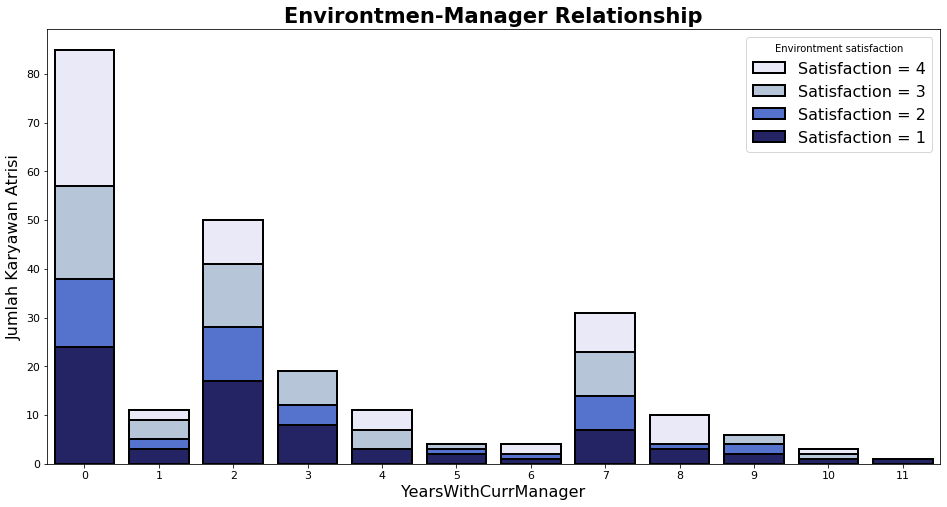

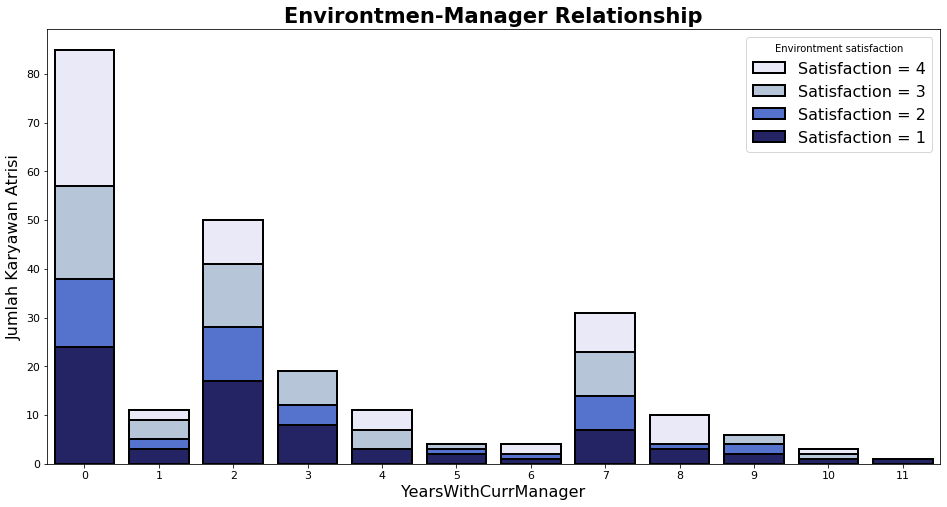

In [ ]:
plt.figure(figsize=(16,8))
g = sns.barplot(x='YearsWithCurrManager', y='satis4', data=ok, 
                color='lavender',
                edgecolor= 'black', 
                linewidth = 2,
               label = 'Satisfaction = 4')
g = sns.barplot(x='YearsWithCurrManager', y='satis3', data=ok, 
                color='lightsteelblue',
                edgecolor= 'black', 
                linewidth = 2,
               label = 'Satisfaction = 3')

g = sns.barplot(x='YearsWithCurrManager', y='satis2', data=ok, 
                color='royalblue',
                edgecolor= 'black', 
                linewidth = 2,
               label = 'Satisfaction = 2')
g = sns.barplot(x='YearsWithCurrManager', y='satis1', data=ok, 
                color='midnightblue',
                edgecolor= 'black', 
                linewidth = 2,
               label = 'Satisfaction = 1')

plt.title('Environtmen-Manager Relationship', 
          color='black', 
          loc='center',
          fontsize=21,
          fontweight='bold',
         fontname="Cambria")

plt.xlabel('YearsWithCurrManager', fontsize=16)
plt.ylabel('Jumlah Karyawan Atrisi', fontsize=16)

plt.tick_params(labelsize = 11)




plt.legend(title ='Environtment satisfaction', loc=0, fontsize=16)
plt.show()

#### Insight Korelasi Environment Satisfaction dengan Lamanya waktu bersama dengan Manager Saat Ini

1. Environtment Satisfaction yang rendah tidak selalu menyebabkan Attrition.

### **Job Satisfaction based on Years With Current Manager**


In [ ]:
job = yes.groupby(['YearsWithCurrManager','JobSatisfaction'])['EmployeeNumber'].nunique().reset_index(name='all')

job1 = job[job['JobSatisfaction'] == 1]
job2 = job[job['JobSatisfaction'] == 2]
job3 = job[job['JobSatisfaction'] == 3]
job4 = job[job['JobSatisfaction'] == 4]

okj = job1.merge(job2, on='YearsWithCurrManager',how='outer').drop(columns = ['JobSatisfaction_x','JobSatisfaction_y'])
okj = okj.merge(job3, on='YearsWithCurrManager',how='outer').drop(columns = ['JobSatisfaction'])
okj = okj.merge(job4, on='YearsWithCurrManager',how='outer').drop(columns = ['JobSatisfaction'])

okj.columns = ['YearsWithCurrManager','job1','job2','job3','job4']

In [ ]:
okj = okj.fillna(0)
okj['job2'] = okj['job1']+okj['job2']

In [ ]:
okj['job3'] = okj['job2']+okj['job3']

In [ ]:
okj['job4'] = okj['job3']+okj['job4']

In [ ]:
okj

,YearsWithCurrManager,job1,job2,job3,job4
0,0,25.0,43.0,67.0,85.0
1,1,1.0,2.0,9.0,11.0
2,2,15.0,24.0,43.0,50.0
3,3,6.0,8.0,14.0,19.0
4,4,4.0,8.0,8.0,11.0
5,6,1.0,1.0,2.0,4.0
6,7,8.0,15.0,25.0,31.0
7,8,1.0,3.0,7.0,10.0
8,9,2.0,3.0,3.0,6.0
9,10,1.0,2.0,3.0,3.0


,YearsWithCurrManager,job1,job2,job3,job4
0,0,25.0,43.0,67.0,85.0
1,1,1.0,2.0,9.0,11.0
2,2,15.0,24.0,43.0,50.0
3,3,6.0,8.0,14.0,19.0
4,4,4.0,8.0,8.0,11.0
5,6,1.0,1.0,2.0,4.0
6,7,8.0,15.0,25.0,31.0
7,8,1.0,3.0,7.0,10.0
8,9,2.0,3.0,3.0,6.0
9,10,1.0,2.0,3.0,3.0


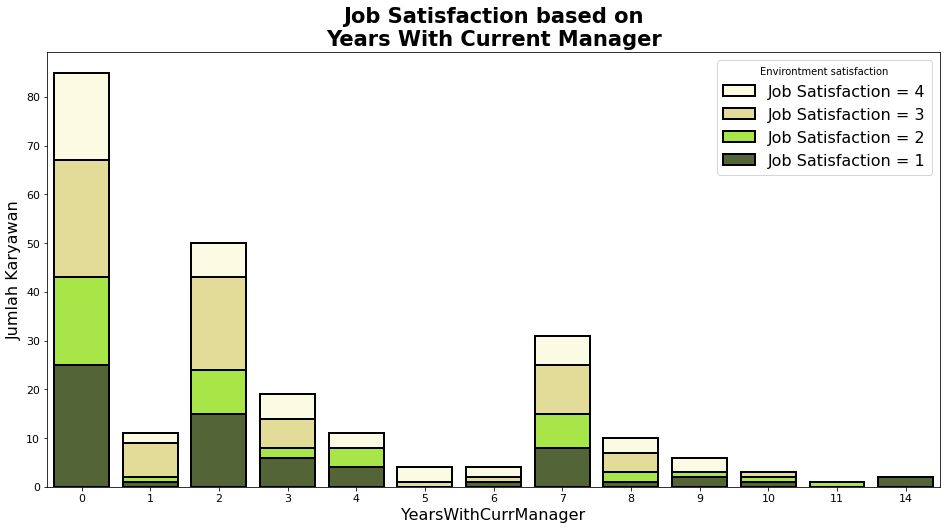

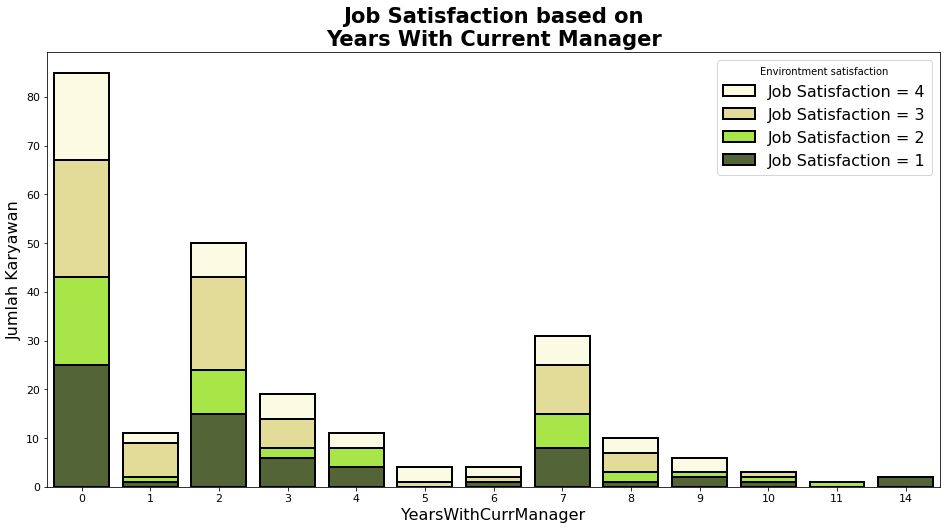

In [ ]:
plt.figure(figsize=(16,8))
g = sns.barplot(x='YearsWithCurrManager', y='job4', data=okj, 
                color='lightyellow',
                edgecolor= 'black', 
                linewidth = 2,
               label = 'Job Satisfaction = 4')
g = sns.barplot(x='YearsWithCurrManager', y='job3', data=okj, 
                color='khaki',
                edgecolor= 'black', 
                linewidth = 2,
               label = 'Job Satisfaction = 3')

g = sns.barplot(x='YearsWithCurrManager', y='job2', data=okj, 
                color='greenyellow',
                edgecolor= 'black', 
                linewidth = 2,
               label = 'Job Satisfaction = 2')
g = sns.barplot(x='YearsWithCurrManager', y='job1', data=okj, 
                color='darkolivegreen',
                edgecolor= 'black', 
                linewidth = 2,
               label = 'Job Satisfaction = 1')

plt.title('Job Satisfaction based on\nYears With Current Manager', 
          color='black', 
          loc='center',
          fontsize=21,
          fontweight='bold',
         fontname="Cambria")

plt.xlabel('YearsWithCurrManager', fontsize=16)
plt.ylabel('Jumlah Karyawan', fontsize=16)

plt.tick_params(labelsize = 11)




plt.legend(title ='Environtment satisfaction', loc=0, fontsize=16)
plt.show()

#### Insight Korelasi Job Satisfaction dengan Lamanya waktu bersama dengan Manager Saat Ini

1.Job Satisfaction yang rendah tidak selalu menyebabkan Attrition.

# STAGE 2

## **PREPROCESSING**

### Handling Outliers

#### Bagi Data Menjadi Features dan Category

In [ ]:
features = ['Age',
	'DailyRate',
	'DistanceFromHome',
	'Education',
	'EmployeeCount',
	'EmployeeNumber',
	'EnvironmentSatisfaction',
	'HourlyRate',
	'JobInvolvement',
	'JobLevel',
 	'JobSatisfaction',
 	'MonthlyIncome',
 	'MonthlyRate',
 	'NumCompaniesWorked',
 	'PercentSalaryHike',
 	'PerformanceRating',
 	'RelationshipSatisfaction',
	'StandardHours',
	'StockOptionLevel',
	'TotalWorkingYears',
	'TrainingTimesLastYear',
	'WorkLifeBalance',
	'YearsAtCompany',
	'YearsInCurrentRole',
	'YearsSinceLastPromotion',
	'YearsWithCurrManager',
  'PercentSalaryHike']
cats = ['Attrition','BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

In [ ]:
print(len(features))
print(len(cats))
# Total Coloumn 35 Sesuai Dengan Data

27
9
27
9


#### Cek Persebaran dan Tentukan Data yang Terdapat Outliers

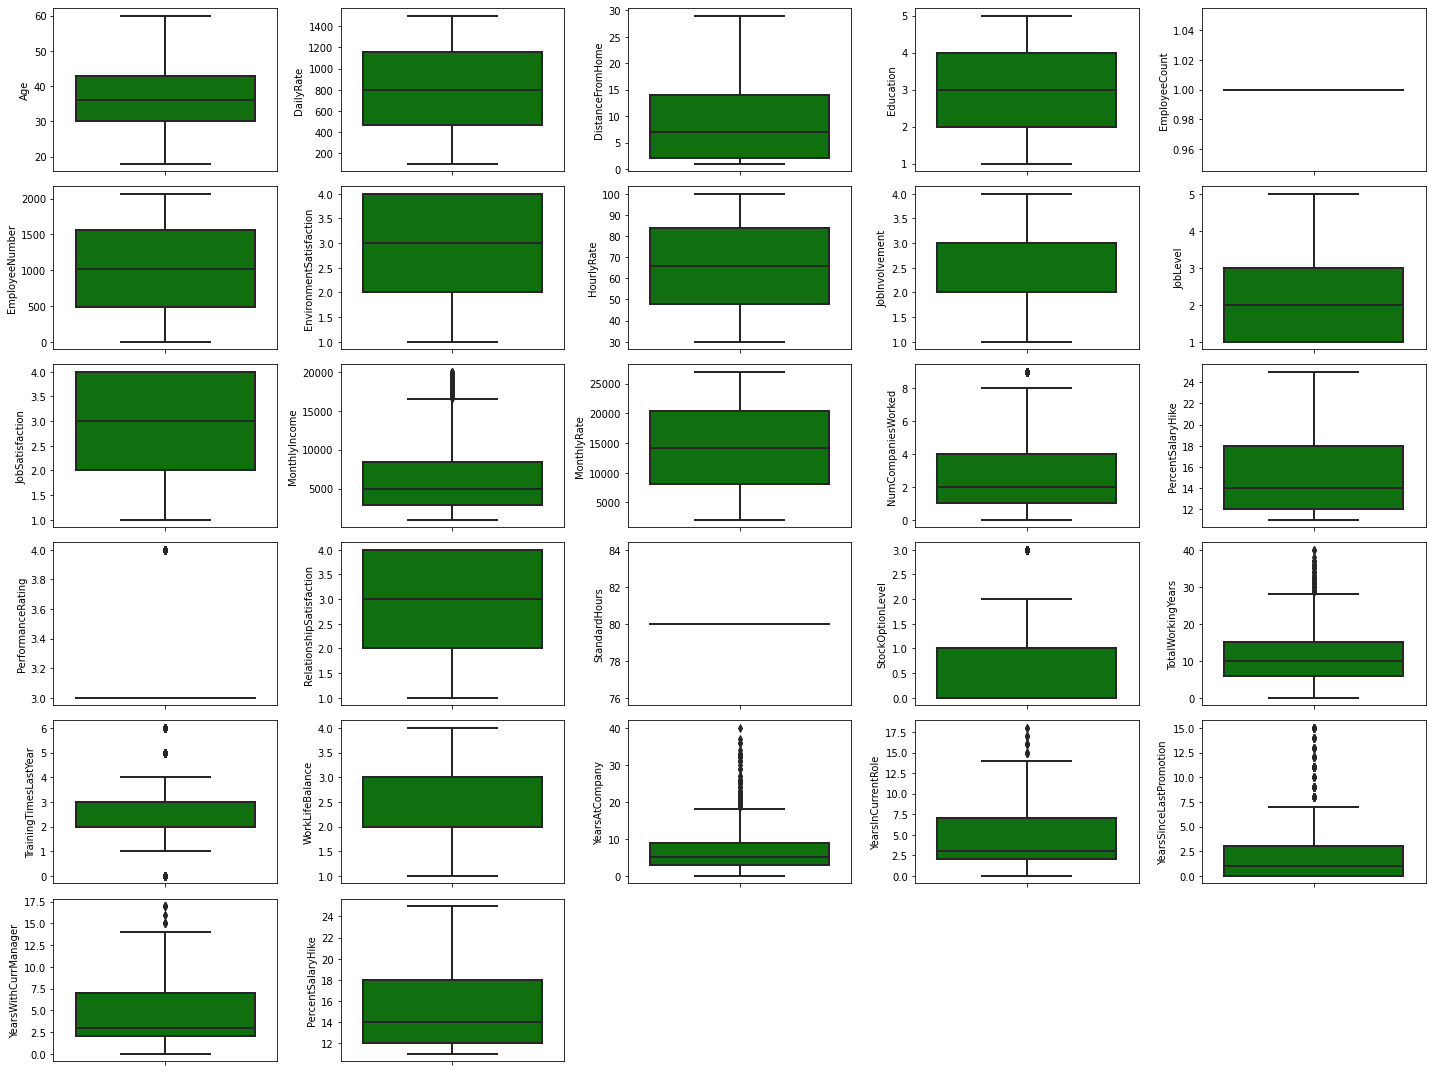

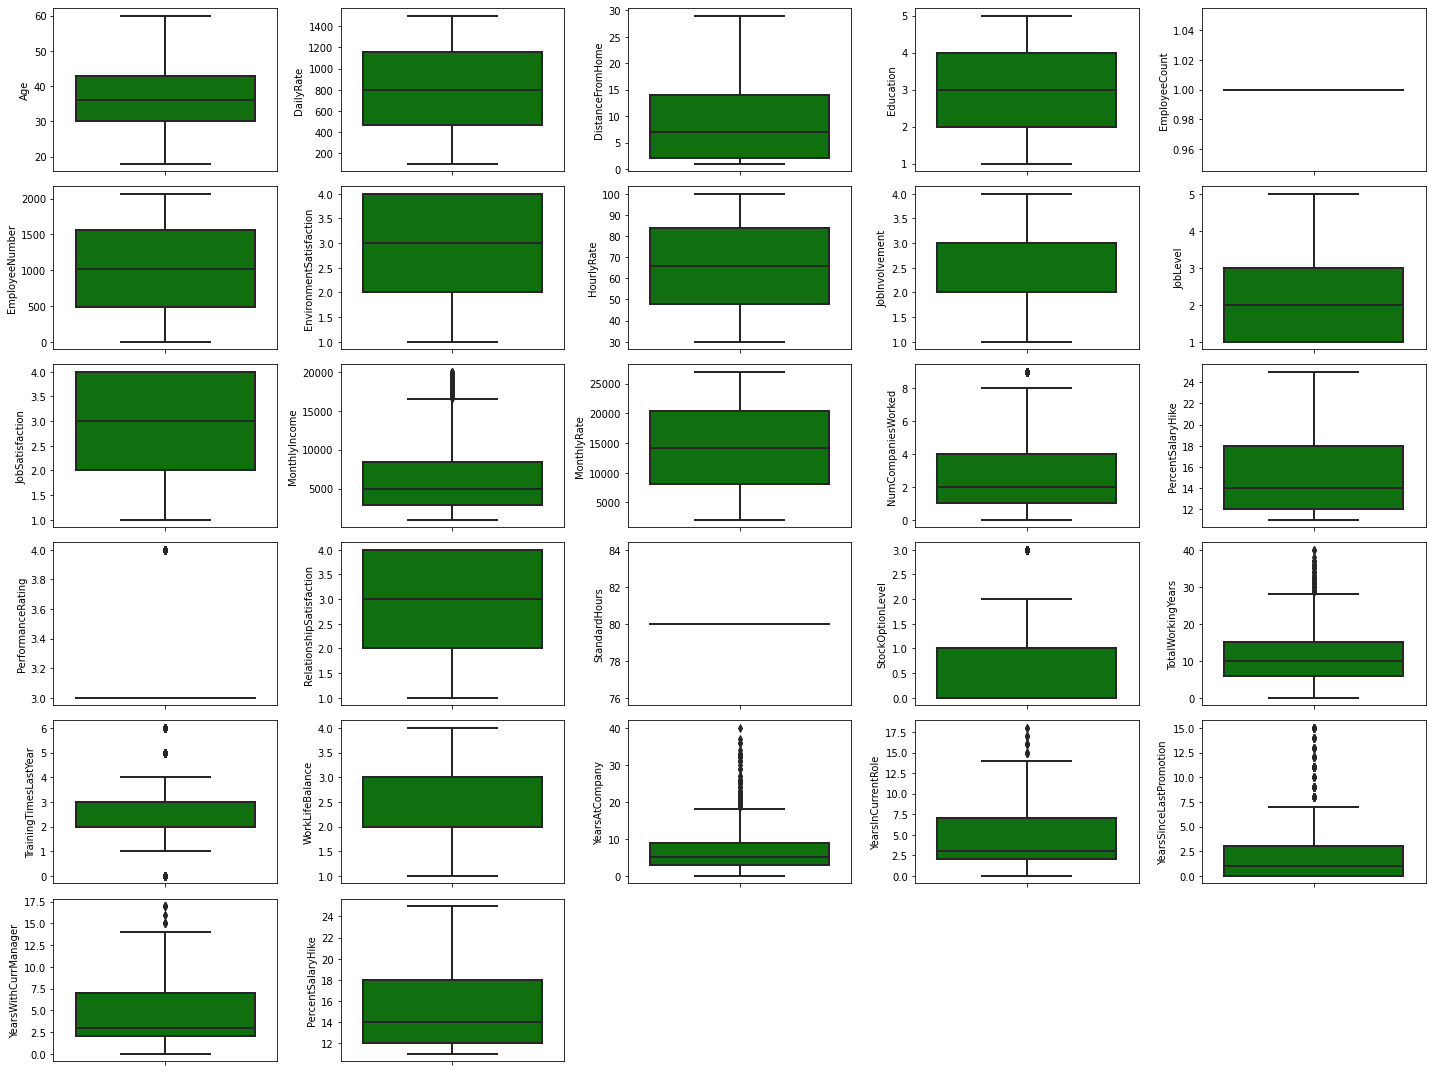

In [ ]:
plt.figure(figsize = (20,15))
for i in range(0, len(features)): 
  plt.subplot(6, 5, i+1)
  sns.boxplot(y = use_df[features[i]], color = 'green')
  plt.tight_layout()

Data yang Terdapat Outliers:

MonthlyIncome, 
NumCompaniesWorked, 
StockOptionLevel, 
TotalWorkingYears, 
TrainingTimesLastYear, 
YearsAtCompany, 
YearsInCurrentRole, 
YearsSinceLastPromotion,
YearsWithCurrManager

#### Tentukan Batas Atas Dan Batas Bawah

In [ ]:
# Input Jadi Satu List
outliers_coloumns = ['MonthlyIncome', 
                      'NumCompaniesWorked', 
                      'StockOptionLevel', 
                      'TotalWorkingYears', 
                      'TrainingTimesLastYear', 
                      'YearsAtCompany', 
                      'YearsInCurrentRole', 
                      'YearsSinceLastPromotion', 
                      'YearsWithCurrManager']

# Q1 Untuk Batas Bawah
Q1 = (use_df[outliers_coloumns]).quantile(0.25)

# Q3 Untuk Batas Atas
Q3 = (use_df[outliers_coloumns]).quantile(0.75)

# IQR (Interquartile Range)
IQR = Q3 - Q1

In [ ]:
# Statistik Sebelum Dilakukan Handling
use_df[outliers_coloumns].describe()

,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,6502.931293,2.693197,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,4707.956783,2.498009,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2911.000000,1.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,4919.000000,2.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,8379.000000,4.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,19999.000000,9.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,6502.931293,2.693197,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,4707.956783,2.498009,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2911.000000,1.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,4919.000000,2.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,8379.000000,4.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,19999.000000,9.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Cari Maksimum Q3 
maximum = Q3 + (1.5*IQR)
print('Batas Maximum: ')
print(maximum)

Batas Maximum: 
MonthlyIncome              16581.0
NumCompaniesWorked             8.5
StockOptionLevel               2.5
TotalWorkingYears             28.5
TrainingTimesLastYear          4.5
YearsAtCompany                18.0
YearsInCurrentRole            14.5
YearsSinceLastPromotion        7.5
YearsWithCurrManager          14.5
dtype: float64
Batas Maximum: 
MonthlyIncome              16581.0
NumCompaniesWorked             8.5
StockOptionLevel               2.5
TotalWorkingYears             28.5
TrainingTimesLastYear          4.5
YearsAtCompany                18.0
YearsInCurrentRole            14.5
YearsSinceLastPromotion        7.5
YearsWithCurrManager          14.5
dtype: float64


In [ ]:
# Cari Minimum Q1 
minimum = Q1 - (1.5*IQR)
print('Bata Minimum: ')
print(minimum)

Bata Minimum: 
MonthlyIncome             -5291.0
NumCompaniesWorked           -3.5
StockOptionLevel             -1.5
TotalWorkingYears            -7.5
TrainingTimesLastYear         0.5
YearsAtCompany               -6.0
YearsInCurrentRole           -5.5
YearsSinceLastPromotion      -4.5
YearsWithCurrManager         -5.5
dtype: float64
Bata Minimum: 
MonthlyIncome             -5291.0
NumCompaniesWorked           -3.5
StockOptionLevel             -1.5
TotalWorkingYears            -7.5
TrainingTimesLastYear         0.5
YearsAtCompany               -6.0
YearsInCurrentRole           -5.5
YearsSinceLastPromotion      -4.5
YearsWithCurrManager         -5.5
dtype: float64


#### Filter Data yang Outliers

In [ ]:
for i in range(0, len(outliers_coloumns)):
  use_df = use_df[(use_df[outliers_coloumns[i]] <= maximum[i]) & (use_df[outliers_coloumns[i]] >= minimum[i])]

In [ ]:
# Statistik Setelah Dilakukan Outliers
use_df[outliers_coloumns].describe()

,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000
mean,5080.284324,2.457297,0.672432,9.007568,2.523243,5.429189,3.589189,1.417297,3.547027
std,2919.377276,2.214563,0.688297,5.252390,0.746384,3.681093,3.049713,1.970816,3.041773
min,1051.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2774.000000,1.000000,0.000000,5.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,4404.000000,1.000000,1.000000,9.000000,2.000000,5.000000,2.000000,1.000000,2.000000
75%,6334.000000,4.000000,1.000000,12.000000,3.000000,8.000000,7.000000,2.000000,7.000000
max,16422.000000,8.000000,2.000000,28.000000,4.000000,18.000000,14.000000,7.000000,13.000000


,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000
mean,5080.284324,2.457297,0.672432,9.007568,2.523243,5.429189,3.589189,1.417297,3.547027
std,2919.377276,2.214563,0.688297,5.252390,0.746384,3.681093,3.049713,1.970816,3.041773
min,1051.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2774.000000,1.000000,0.000000,5.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,4404.000000,1.000000,1.000000,9.000000,2.000000,5.000000,2.000000,1.000000,2.000000
75%,6334.000000,4.000000,1.000000,12.000000,3.000000,8.000000,7.000000,2.000000,7.000000
max,16422.000000,8.000000,2.000000,28.000000,4.000000,18.000000,14.000000,7.000000,13.000000


#### Cek Persebaran Setelah Di Hapus Outliers

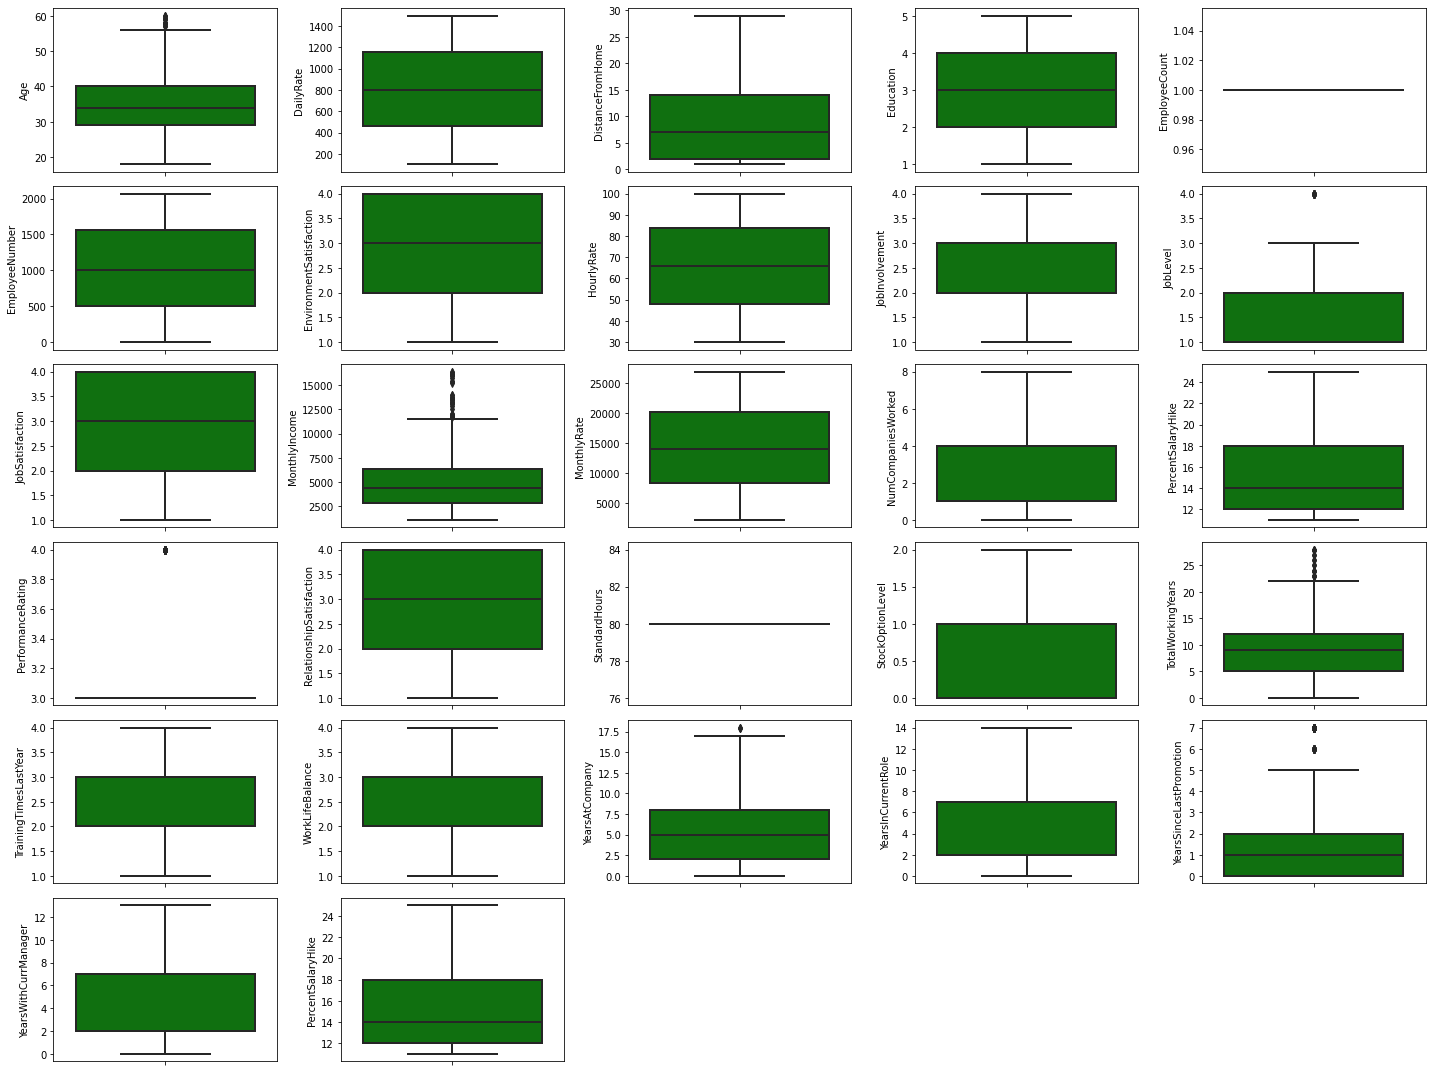

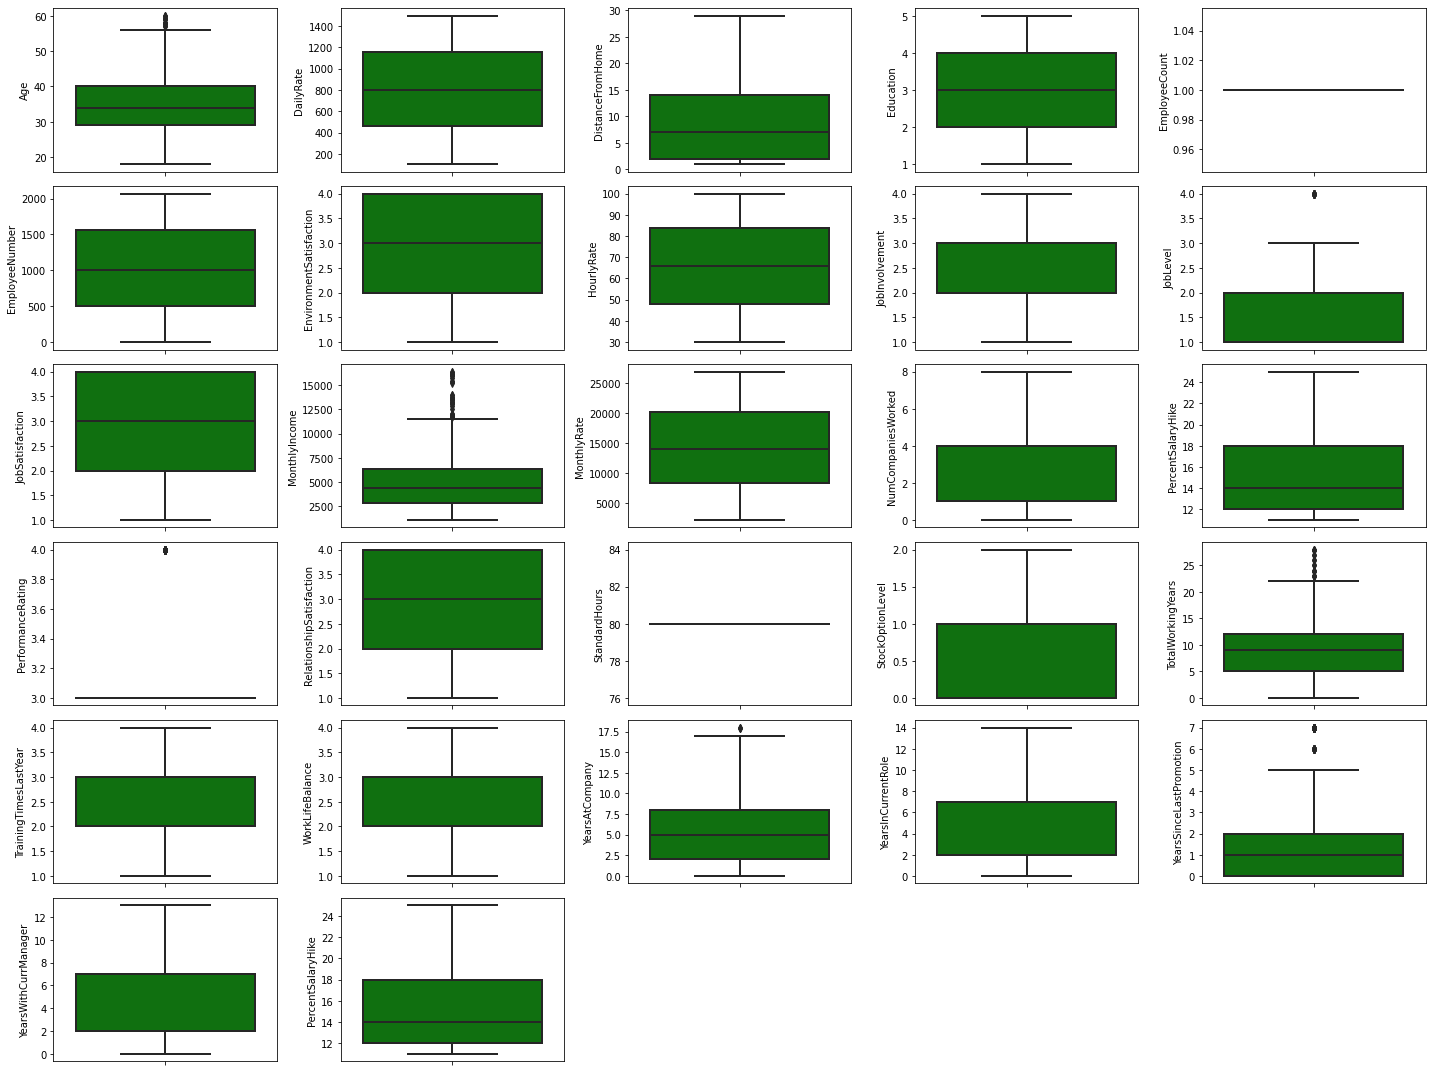

In [ ]:
plt.figure(figsize = (20,15))
for i in range(0, len(features)): 
  plt.subplot(6, 5, i+1)
  sns.boxplot(y = use_df[features[i]], color = 'green')
  plt.tight_layout()

## **FEATURE ENGINEERING**

### Feature Extraction

Menambahkan Fitur Baru

Keterangan Job Role dan Education yang Sesuai 

- Sales Executive,  Sales Representative: Marketing
- Research Scientist, Research Director: Life Sciences
- Healthcare Representative: Medical
- Laboratory Technician, Manufacturing Director: Technical Degree
- HR: HR
- Manager : 
  1. Department HR : HR
  2. Research & Development : Life Sciences, Medical, Technical Degree
  3. Sales : Marketing

- Jika Education Field Others : Maka Akan Ditulis Others

In [ ]:
# Buat Function Untuk Cek Lintas Edu Field / Sesuai Edu Field
result = ''

def cek_edufield (JobRole, EducationField, Department) :
 if (JobRole == 'Sales Executive') | (JobRole == 'Sales Representative'):
   if EducationField == 'Marketing' :
    result = 'Sesuai'
    return result
   elif EducationField == 'Other': 
    result = 'Other'
    return result
   else :
    result = 'Tidak Sesuai' 
    return result

 elif (JobRole == 'Research Scientist') | (JobRole == 'Research Director'):
   if EducationField == 'Life Sciences' : 
    result = 'Sesuai'
    return result
   elif EducationField == 'Other': 
    result = 'Other'
    return result
   else : 
    result = 'Tidak Sesuai' 
    return result

 elif JobRole == 'Healthcare Representative' :
   if EducationField == 'Medical': 
    result = 'Sesuai'
    return result
   elif EducationField == 'Other': 
    result = 'Other'
    return result
   else : 
    result = 'Tidak Sesuai'
    return result

 elif JobRole == 'Human Resources' :
   if EducationField == 'Human Resources' : 
    result = 'Sesuai'
    return result
   elif EducationField == 'Other' : 
    result = 'Sesuai'
    return result
   else :
    result = 'Tidak Sesuai'
    return result
 
 elif (JobRole == 'Laboratory Technician') | (JobRole == 'Manufacturing Director'):
   if EducationField == 'Technical Degree':
     result = 'Sesuai'
     return result
   elif EducationField == 'Other':
     result = 'Other'
     return result
   else :
     result = 'Tidak Sesuai'
     return result

 elif JobRole == 'Manager':
  if Department == 'Human Resources': 
    if EducationField == 'Human Resources':
      result = 'Sesuai'
      return result
    elif EducationField == 'Other': 
      result = 'Other'
      return result
    else :
      result = 'Tidak Sesuai'
      return result
  elif Department == 'Research & Development' :
    if (EducationField == 'Life Sciences') | (EducationField == 'Medical') | (EducationField == 'Technical Degree') : 
      result = 'Sesuai'
      return result
    elif EducationField == 'Other':
      result = 'Other' 
      return result
    else : 
      result = 'Tidak Sesuai'
      return result
  elif Department == 'Sales' :
    if EducationField == 'Marketing':
      result = 'Sesuai'
      return result
    elif EducationField == 'Other':
      result = 'Other'
      return result
    else :
      result = 'Tidak Sesuai'
      return result
  else : 
    result = 'Department Tidak Ditemukan'
    return result

 else :
   result = 'Job Role Tidak Tercantum Dalam List'
   return result

cek_edufield('Sales Representative','Marketing','Sales')

'Sesuai'

'Sesuai'

In [ ]:
# Apply Function Kedalam Data
use_df['Kesesuaian Karir'] = use_df.apply(lambda x: cek_edufield(x['JobRole'], x['EducationField'], x['Department']), axis = 1)

### Feature Selection

In [ ]:
# Drop Coloumn Dengan Unique Hanya 1
use_df= use_df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])

In [ ]:
use_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,925.0,35.416216,8.628501,18.0,29.0,34.0,40.0,60.0
DailyRate,925.0,799.051892,402.137500,103.0,461.0,802.0,1157.0,1498.0
DistanceFromHome,925.0,9.331892,8.143937,1.0,2.0,7.0,14.0,29.0
Education,925.0,2.891892,1.023104,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,925.0,2.727568,1.084796,1.0,2.0,3.0,4.0,4.0
HourlyRate,925.0,65.976216,20.475978,30.0,48.0,66.0,84.0,100.0
JobInvolvement,925.0,2.739459,0.711843,1.0,2.0,3.0,3.0,4.0
JobLevel,925.0,1.743784,0.754694,1.0,1.0,2.0,2.0,4.0
JobSatisfaction,925.0,2.712432,1.111484,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,925.0,5080.284324,2919.377276,1051.0,2774.0,4404.0,6334.0,16422.0


,count,mean,std,min,25%,50%,75%,max
Age,925.0,35.416216,8.628501,18.0,29.0,34.0,40.0,60.0
DailyRate,925.0,799.051892,402.137500,103.0,461.0,802.0,1157.0,1498.0
DistanceFromHome,925.0,9.331892,8.143937,1.0,2.0,7.0,14.0,29.0
Education,925.0,2.891892,1.023104,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,925.0,2.727568,1.084796,1.0,2.0,3.0,4.0,4.0
HourlyRate,925.0,65.976216,20.475978,30.0,48.0,66.0,84.0,100.0
JobInvolvement,925.0,2.739459,0.711843,1.0,2.0,3.0,3.0,4.0
JobLevel,925.0,1.743784,0.754694,1.0,1.0,2.0,2.0,4.0
JobSatisfaction,925.0,2.712432,1.111484,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,925.0,5080.284324,2919.377276,1051.0,2774.0,4404.0,6334.0,16422.0


### Feature Encoding

In [ ]:
# Label
Gender = {
    'Female' : 0,
    'Male' : 1
}

Attrition = {
    'No' : 0,
    'Yes' : 1
}

Overtime = {
    'No' : 0,
    'Yes' : 1
}

travel = {
    'Travel_Frequently':2,
    'Travel_Rarely':1,
    'Non-Travel':0
}

Kesesuaian_Karir = {
    'Tidak Sesuai' : 0,
    'Sesuai' : 1,
    'Other' : 2
}

use_df['BusinessTravel'] = use_df['BusinessTravel'].map(travel)
use_df['Gender'] = use_df['Gender'].map(Gender)
use_df['Attrition'] = use_df['Attrition'].map(Attrition)
use_df['OverTime'] = use_df['OverTime'].map(Overtime)
use_df['Kesesuaian Karir'] = use_df['Kesesuaian Karir'].map(Kesesuaian_Karir)

In [ ]:
# OHE 
for cat in ['JobRole', 'Department', 'EducationField', 'MaritalStatus']:
    onehots = pd.get_dummies(use_df[cat], prefix=cat)
    use_df = use_df.join(onehots)
    use_df = use_df.drop(columns = [cat])

In [ ]:
use_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,925.0,35.416216,8.628501,18.0,29.0,34.0,40.0,60.0
Attrition,925.0,0.176216,0.381210,0.0,0.0,0.0,0.0,1.0
BusinessTravel,925.0,1.099459,0.527234,0.0,1.0,1.0,1.0,2.0
DailyRate,925.0,799.051892,402.137500,103.0,461.0,802.0,1157.0,1498.0
DistanceFromHome,925.0,9.331892,8.143937,1.0,2.0,7.0,14.0,29.0
Education,925.0,2.891892,1.023104,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,925.0,2.727568,1.084796,1.0,2.0,3.0,4.0,4.0
Gender,925.0,0.618378,0.486047,0.0,0.0,1.0,1.0,1.0
HourlyRate,925.0,65.976216,20.475978,30.0,48.0,66.0,84.0,100.0
JobInvolvement,925.0,2.739459,0.711843,1.0,2.0,3.0,3.0,4.0


,count,mean,std,min,25%,50%,75%,max
Age,925.0,35.416216,8.628501,18.0,29.0,34.0,40.0,60.0
Attrition,925.0,0.176216,0.381210,0.0,0.0,0.0,0.0,1.0
BusinessTravel,925.0,1.099459,0.527234,0.0,1.0,1.0,1.0,2.0
DailyRate,925.0,799.051892,402.137500,103.0,461.0,802.0,1157.0,1498.0
DistanceFromHome,925.0,9.331892,8.143937,1.0,2.0,7.0,14.0,29.0
Education,925.0,2.891892,1.023104,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,925.0,2.727568,1.084796,1.0,2.0,3.0,4.0,4.0
Gender,925.0,0.618378,0.486047,0.0,0.0,1.0,1.0,1.0
HourlyRate,925.0,65.976216,20.475978,30.0,48.0,66.0,84.0,100.0
JobInvolvement,925.0,2.739459,0.711843,1.0,2.0,3.0,3.0,4.0


### Normalisasi Data

In [ ]:
# Test Normalisasi Dipaling Akhir Setelah SemuaFeatur Masuk Agar Nilai Sama Semua
from sklearn.preprocessing import MinMaxScaler
for i in use_df:
  print(i)
  use_df[i] = MinMaxScaler().fit_transform(use_df[i].values.reshape(len(use_df), 1))

Age
Attrition
BusinessTravel
DailyRate
DistanceFromHome
Education
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
Kesesuaian Karir
JobRole_Healthcare Representative
JobRole_Human Resources
JobRole_Laboratory Technician
JobRole_Manager
JobRole_Manufacturing Director
JobRole_Research Director
JobRole_Research Scientist
JobRole_Sales Executive
JobRole_Sales Representative
Department_Human Resources
Department_Research & Development
Department_Sales
EducationField_Human Resources
EducationField_Life Sciences
EducationField_Marketing
EducationField_Medical
EducationField_Other
EducationField_Technical Degree
MaritalStatus_Divorced
MaritalStatus_Married
MaritalStatus_Single
Age
Attrition
Business

# STAGE 3

## **MACHINE LEARNING**

### Split Data

In [ ]:
import warnings
warnings.filterwarnings('ignore')

X = use_df.drop(columns = ['Attrition'])
y = use_df[['Attrition']]

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, get_scorer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Model (Classification)

In [ ]:
# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### Evaluation Function

In [ ]:
def eval_classification(model): 
  # Prediction
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  y_pred_proba = model.predict_proba(X_test)
  y_pred_proba_train = model.predict_proba(X_train)
  
  # Test Score
  print('Scoring')
  print('Accuracy (Test): %.2f' % accuracy_score(y_test, y_pred))
  print('Accuracy (Train): %.2f' % accuracy_score(y_train, y_pred_train))
  print('Precision (Test): %.2f' % precision_score(y_test, y_pred))
  print('Precision (Train): %.2f' % precision_score(y_train, y_pred_train))
  print('Recall (Test): %.2f' % recall_score(y_test, y_pred))
  print('Recall (Train): %.2f' % recall_score(y_train, y_pred_train))
  print('F1 (Test): %.2f' % f1_score(y_test, y_pred))
  print('F1 (Train): %.2f' % f1_score(y_train, y_pred_train))
  print('AUC (Test Proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
  print('AUC (Train Proba): %.2f' % roc_auc_score(y_train, y_pred_proba_train[:,1]))
  print('Test Score: %.2f' % model.score(X_test, y_test))
  print('Train Score: %.2f' % model.score(X_train, y_train))

#### No Balancing

In [ ]:
use_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,925.0,0.414672,0.205441,0.0,0.261905,0.380952,0.523810,1.0
Attrition,925.0,0.176216,0.381210,0.0,0.000000,0.000000,0.000000,1.0
BusinessTravel,925.0,0.549730,0.263617,0.0,0.500000,0.500000,0.500000,1.0
DailyRate,925.0,0.498962,0.288271,0.0,0.256631,0.501075,0.755556,1.0
DistanceFromHome,925.0,0.297568,0.290855,0.0,0.035714,0.214286,0.464286,1.0
Education,925.0,0.472973,0.255776,0.0,0.250000,0.500000,0.750000,1.0
EnvironmentSatisfaction,925.0,0.575856,0.361599,0.0,0.333333,0.666667,1.000000,1.0
Gender,925.0,0.618378,0.486047,0.0,0.000000,1.000000,1.000000,1.0
HourlyRate,925.0,0.513946,0.292514,0.0,0.257143,0.514286,0.771429,1.0
JobInvolvement,925.0,0.579820,0.237281,0.0,0.333333,0.666667,0.666667,1.0


,count,mean,std,min,25%,50%,75%,max
Age,925.0,0.414672,0.205441,0.0,0.261905,0.380952,0.523810,1.0
Attrition,925.0,0.176216,0.381210,0.0,0.000000,0.000000,0.000000,1.0
BusinessTravel,925.0,0.549730,0.263617,0.0,0.500000,0.500000,0.500000,1.0
DailyRate,925.0,0.498962,0.288271,0.0,0.256631,0.501075,0.755556,1.0
DistanceFromHome,925.0,0.297568,0.290855,0.0,0.035714,0.214286,0.464286,1.0
Education,925.0,0.472973,0.255776,0.0,0.250000,0.500000,0.750000,1.0
EnvironmentSatisfaction,925.0,0.575856,0.361599,0.0,0.333333,0.666667,1.000000,1.0
Gender,925.0,0.618378,0.486047,0.0,0.000000,1.000000,1.000000,1.0
HourlyRate,925.0,0.513946,0.292514,0.0,0.257143,0.514286,0.771429,1.0
JobInvolvement,925.0,0.579820,0.237281,0.0,0.333333,0.666667,0.666667,1.0


##### Logistic Regression

In [ ]:
# Model
lr = LogisticRegression()
lr.fit(X_train,y_train)

# Evaluation
eval_classification(lr)

Scoring
Accuracy (Test): 0.88
Accuracy (Train): 0.88
Precision (Test): 0.62
Precision (Train): 0.81
Recall (Test): 0.46
Recall (Train): 0.44
F1 (Test): 0.53
F1 (Train): 0.57
AUC (Test Proba): 0.90
AUC (Train Proba): 0.87
Test Score: 0.88
Train Score: 0.88
Scoring
Accuracy (Test): 0.88
Accuracy (Train): 0.88
Precision (Test): 0.62
Precision (Train): 0.81
Recall (Test): 0.46
Recall (Train): 0.44
F1 (Test): 0.53
F1 (Train): 0.57
AUC (Test Proba): 0.90
AUC (Train Proba): 0.87
Test Score: 0.88
Train Score: 0.88


In [ ]:
# Hyperparameter Tuning
penalty = ['l1','l2','none']
C = [int(x) for x in np.linspace(0.0001, 1)]
solver = ['newton-cg', 'saga', 'sag']

hyperparam = dict(penalty = penalty, 
                  C=C, 
                  solver = solver)

lr = LogisticRegression()
rs = RandomizedSearchCV(lr, hyperparam, cv = 5, scoring = 'roc_auc')
rs.fit(X_train, y_train)

eval_classification(rs)

Scoring
Accuracy (Test): 0.86
Accuracy (Train): 0.89
Precision (Test): 0.54
Precision (Train): 0.80
Recall (Test): 0.50
Recall (Train): 0.52
F1 (Test): 0.52
F1 (Train): 0.63
AUC (Test Proba): 0.89
AUC (Train Proba): 0.87
Test Score: 0.89
Train Score: 0.87
Scoring
Accuracy (Test): 0.86
Accuracy (Train): 0.89
Precision (Test): 0.54
Precision (Train): 0.80
Recall (Test): 0.50
Recall (Train): 0.52
F1 (Test): 0.52
F1 (Train): 0.63
AUC (Test Proba): 0.89
AUC (Train Proba): 0.87
Test Score: 0.89
Train Score: 0.87


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = rs.predict(X_test)
y_pred_train = rs.predict(X_train)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[145  12]
 [ 14  14]]
[[145  12]
 [ 14  14]]


In [ ]:
rs.best_estimator_.get_params()

{'C': 0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

{'C': 0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

##### Decision Tree

In [ ]:
# Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# Evaluation
eval_classification(dt)

Scoring
Accuracy (Test): 0.76
Accuracy (Train): 1.00
Precision (Test): 0.28
Precision (Train): 1.00
Recall (Test): 0.36
Recall (Train): 1.00
F1 (Test): 0.31
F1 (Train): 1.00
AUC (Test Proba): 0.60
AUC (Train Proba): 1.00
Test Score: 0.76
Train Score: 1.00
Scoring
Accuracy (Test): 0.76
Accuracy (Train): 1.00
Precision (Test): 0.27
Precision (Train): 1.00
Recall (Test): 0.36
Recall (Train): 1.00
F1 (Test): 0.31
F1 (Train): 1.00
AUC (Test Proba): 0.59
AUC (Train Proba): 1.00
Test Score: 0.76
Train Score: 1.00


In [ ]:
# Tuning Hyperparameter
min_samples_split = [int(x) for x in np.linspace(1, 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10)]
max_features = ['auto', 'sqrt', 'log2', 'none']
criterion = ['gini', 'entropy']

hyperparams = dict(min_samples_split = min_samples_split,
                   min_samples_leaf = min_samples_leaf,
                   max_features = max_features,
                   criterion = criterion)

dt = DecisionTreeClassifier()
rs = RandomizedSearchCV(dt, 
                  hyperparams, 
                  cv = 5, 
                  scoring = 'roc_auc')
rs.fit(X_train, y_train)

# Evaluation
eval_classification(rs)

Scoring
Accuracy (Test): 0.85
Accuracy (Train): 0.88
Precision (Test): 0.50
Precision (Train): 0.73
Recall (Test): 0.36
Recall (Train): 0.51
F1 (Test): 0.42
F1 (Train): 0.60
AUC (Test Proba): 0.64
AUC (Train Proba): 0.93
Test Score: 0.64
Train Score: 0.93
Scoring
Accuracy (Test): 0.84
Accuracy (Train): 0.85
Precision (Test): 0.44
Precision (Train): 0.76
Recall (Test): 0.14
Recall (Train): 0.29
F1 (Test): 0.22
F1 (Train): 0.42
AUC (Test Proba): 0.62
AUC (Train Proba): 0.87
Test Score: 0.62
Train Score: 0.87


In [ ]:
rs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 8,
 'min_samples_split': 9,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

#### Balancing (SMOTE)

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
X_train_smote, y_train_smote = over_sampling.SMOTE(1,random_state=42).fit_resample(X_train, y_train)

In [ ]:
Not_Attrition = []
Attrition = []

for i in y_train_smote['Attrition']: 
  if(i == 0):
    Not_Attrition.append(i)
  else :
    Attrition.append(i)

print('Not_Attrition:', len(Not_Attrition))
print('Attrition:', len(Attrition))

Not_Attrition: 605
Attrition: 605
Not_Attrition: 605
Attrition: 605


##### Logistic Regression

In [ ]:
def eval_classification_smote(model): 
  # Prediction
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train_smote)
  y_pred_proba = model.predict_proba(X_test)
  y_pred_proba_train = model.predict_proba(X_train_smote)
  
  # Test Score
  print('Scoring')
  print('Accuracy (Test): %.2f' % accuracy_score(y_test, y_pred))
  print('Accuracy (Train): %.2f' % accuracy_score(y_train_smote, y_pred_train))
  print('Precision (Test): %.2f' % precision_score(y_test, y_pred))
  print('Precision (Train): %.2f' % precision_score(y_train_smote, y_pred_train))
  print('Recall (Test): %.2f' % recall_score(y_test, y_pred))
  print('Recall (Train): %.2f' % recall_score(y_train_smote, y_pred_train))
  print('F1 (Test): %.2f' % f1_score(y_test, y_pred))
  print('F1 (Train): %.2f' % f1_score(y_train_smote, y_pred_train))
  print('AUC (Test Proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
  print('AUC (Train Proba): %.2f' % roc_auc_score(y_train_smote, y_pred_proba_train[:,1]))
  print('Test Score: %.2f' % model.score(X_test, y_test))
  print('Train Score: %.2f' % model.score(X_train_smote, y_train_smote))
  

In [ ]:
# Model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(lr)

Scoring
Accuracy (Test): 0.80
Accuracy (Train): 0.83
Precision (Test): 0.42
Precision (Train): 0.81
Recall (Test): 0.89
Recall (Train): 0.85
F1 (Test): 0.57
F1 (Train): 0.83
AUC (Test Proba): 0.90
AUC (Train Proba): 0.90
Test Score: 0.80
Train Score: 0.83


In [ ]:
# Hyperparameter Tuning
penalty = ['none']
C = [0]
solver = ['saga']
random_state = [42]

hyperparam = dict(penalty = penalty, 
                  C=C, 
                  solver = solver,
                  random_state=random_state)

lr = LogisticRegression(random_state=42)
lr_tune_smote = RandomizedSearchCV(lr, hyperparam, random_state=42, cv = 5, scoring = 'roc_auc')
lr_tune_smote.fit(X_train_smote, y_train_smote)

eval_classification_smote(lr_tune_smote)

Scoring
Accuracy (Test): 0.81
Accuracy (Train): 0.82
Precision (Test): 0.44
Precision (Train): 0.81
Recall (Test): 0.89
Recall (Train): 0.85
F1 (Test): 0.59
F1 (Train): 0.83
AUC (Test Proba): 0.88
AUC (Train Proba): 0.90
Test Score: 0.88
Train Score: 0.90


In [ ]:
lr_tune_smote.best_estimator_.get_params()

{'C': 0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': 42,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

##### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote)
eval_classification_smote(dt)

Scoring
Accuracy (Test): 0.75
Accuracy (Train): 1.00
Precision (Test): 0.28
Precision (Train): 1.00
Recall (Test): 0.43
Recall (Train): 1.00
F1 (Test): 0.34
F1 (Train): 1.00
AUC (Test Proba): 0.62
AUC (Train Proba): 1.00
Test Score: 0.75
Train Score: 1.00


In [ ]:
# Tuning Hyperparameter
min_samples_split = [int(x) for x in np.linspace(1, 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10)]
max_features = ['auto', 'sqrt', 'log2', 'none']
criterion = ['gini', 'entropy']
max_depth = [900, 400, 450] # Maximum number of levels in tree

hyperparams = dict(min_samples_split = min_samples_split,
                   min_samples_leaf = min_samples_leaf,
                   max_features = max_features,
                   criterion = criterion,
                   max_depth=max_depth)

dt = DecisionTreeClassifier()

gs_dt = GridSearchCV(dt, 
                  hyperparams, 
                  cv = 5, 
                  scoring = 'roc_auc')

rs = RandomizedSearchCV(dt, 
                  hyperparams, 
                  cv = 5, 
                  scoring = 'roc_auc')

rs.fit(X_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(rs)

Scoring
Accuracy (Test): 0.75
Accuracy (Train): 0.92
Precision (Test): 0.21
Precision (Train): 0.93
Recall (Test): 0.25
Recall (Train): 0.89
F1 (Test): 0.23
F1 (Train): 0.91
AUC (Test Proba): 0.52
AUC (Train Proba): 0.98
Test Score: 0.52
Train Score: 0.98


In [ ]:
rs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 450,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Confusion Matrix 
Model yang Digunakan Dalam Confusion Matrix Menggunakan Perlakuan Balancing SMOTE, dan Sudah di Tune Hyperparameter

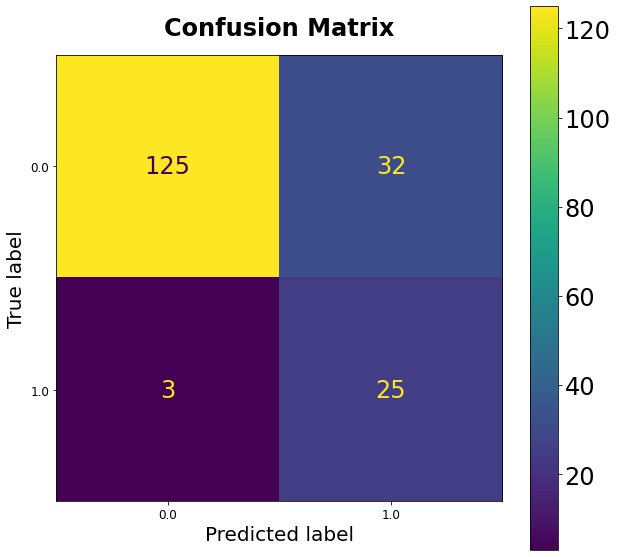

In [ ]:
y_pred = lr_tune_smote.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Confusion Matrix', fontsize = 24, fontweight = 'bold', pad = 20, color='black')
plt.rcParams['font.size'] = 24
plt.xlabel('Predicted Label', fontsize = 20)
plt.ylabel('True Label', fontsize = 20)
plot_confusion_matrix(lr_tune_smote, X_test, y_test, ax=ax)
plt.show()

### Feature Importance
Model yang Digunakan Dalam Feature Importance Menggunakan Perlakuan Balancing SMOTE, dan Sudah di Tune Hyperparameter

In [ ]:
# Best Parameter 
importances = pd.DataFrame(data={
    'Attribute': X_train_smote.columns,
    'Importance': lr_tune_smote.best_estimator_.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

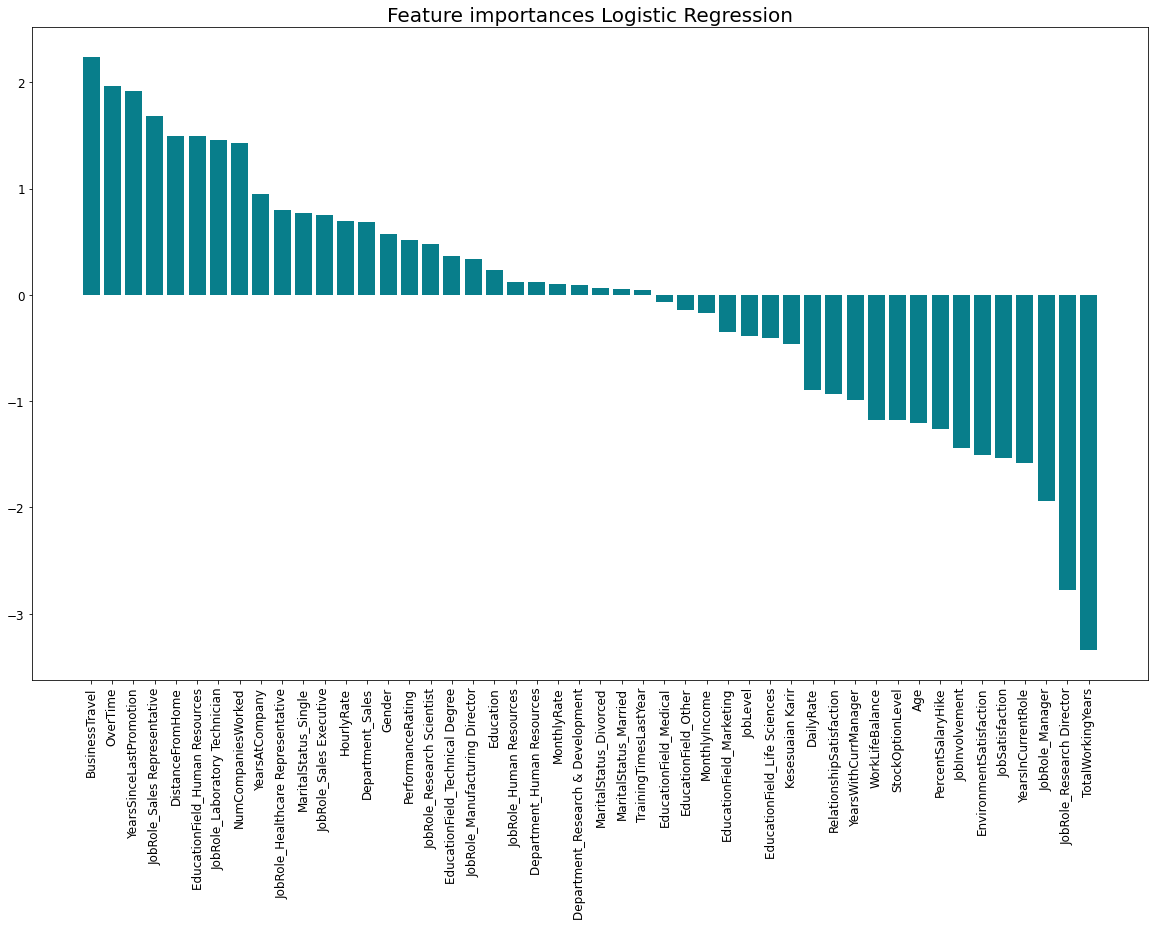

In [ ]:
plt.figure(figsize=(20,12))
plt.rcParams['font.size'] = 12
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances Logistic Regression', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Predict New Data

### Function

In [ ]:
# Function Apply New Fitur Ke Dalam Data
def apply_new_feature (use_df):
  use_df['Kesesuaian Karir'] = use_df.apply(lambda x: cek_edufield(x['JobRole'], x['EducationField'], x['Department']), axis = 1)
  return use_df

In [ ]:
# Feature Selection
def feat_selection (use_df): 
  use_df = use_df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])
  return use_df

In [ ]:
# Label
def encode_label(use_df):
  Gender = {
      'Female' : 0,
      'Male' : 1
  }

  Overtime = {
      'No' : 0,
      'Yes' : 1
  }

  travel = {
      'Travel_Frequently':2,
      'Travel_Rarely':1,
      'Non-Travel':0
  }

  Kesesuaian_Karir = {
      'Tidak Sesuai' : 0,
      'Sesuai' : 1,
      'Other' : 2
  }

  use_df['BusinessTravel'] = use_df['BusinessTravel'].map(travel)
  use_df['Gender'] = use_df['Gender'].map(Gender)
  use_df['OverTime'] = use_df['OverTime'].map(Overtime)
  use_df['Kesesuaian Karir'] = use_df['Kesesuaian Karir'].map(Kesesuaian_Karir)
  return use_df

In [ ]:
# Function Feature Encoding - One Hot Encoding (OHE)
def encode_ohe(use_df): 
  for cat in ['JobRole', 'Department', 'EducationField', 'MaritalStatus']:
    onehots = pd.get_dummies(use_df[cat], prefix=cat)
    use_df = use_df.join(onehots)
    use_df = use_df.drop(columns = [cat])
  return use_df

In [ ]:
# Normalisasi Data
def normalize_data (use_df):
  for i in use_df:
    use_df[i] = MinMaxScaler().fit_transform(use_df[i].values.reshape(len(use_df), 1))
  return use_df

In [ ]:
# Prediction
def prediction(new_data):
  # Preprocessing
  use_df = new_data
  use_df = apply_new_feature(use_df)
  use_df = feat_selection(use_df)
  use_df = encode_label(use_df)
  use_df = encode_ohe(use_df)
  use_df = normalize_data(use_df)

  # Model Prediction
  new_output = lr_tune_smote.predict(use_df)
  new_data['Attrition'] = new_output

  # Label Attrition Menjadi Yes / No
  Attrition = {
     0 : 'No',
     1 : 'Yes'
     }
  new_data['Attrition'] = new_data['Attrition'].map(Attrition)
  return new_data

### Import Data

In [ ]:
# Untuk Upload File
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  df_upload = pd.read_csv(path, delimiter = ";")

TypeError: ignored

### Import To Maching Learning

In [ ]:
prediction(df_upload)

In [ ]:
#df_upload = df_upload.drop(columns = ['Attrition'])

In [ ]:
yes = df_upload[df_upload['Attrition'] == 1]
no = df_upload[df_upload['Attrition'] == 0]
fig = plt.figure(figsize=(10,8))

plt.pie(pd.Series(df_upload['Attrition']).value_counts(), autopct='%1.1f%%', colors = ['blue', 'goldenrod'], textprops={'fontsize': 18, 'fontweight' : 'bold'})
plt.title('Attrition Rate', color='Black', fontsize=20)
plt.legend(['Non-Attrition','Attrition'])
plt.show()